# Curso de Manejo de Datos Faltantes para Data Science: Exploración

[![Curso creado por jvelezmagic](https://img.shields.io/badge/Desarrollado%20por-%40jvelezmagic-blue?&style=for-the-badge&logo=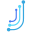)](https://jvelezmagic.com/)
[![Ivanozono LinkedIn](https://img.shields.io/badge/Ivanozono-LinkedIn-orange?style=for-the-badge)](https://www.linkedin.com/in/ivan-ozono)


![Curso de Exploración de Valores Faltantes para Data Science](logo-curso.jpeg)

## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib==3.5.1 missingno numpy pandas pyreadr seaborn session-info upsetplot==0.6.1
```

or 

```bash
pip install -r requirements.txt
```

## Importar librerías



Las siguientes bibliotecas son fundamentales para la manipulación, análisis y visualización en nuestro estudio de valores faltantes en el conjunto de datos:

- `janitor`: Simplifica la limpieza y el procesamiento de DataFrames en Pandas.
- `matplotlib.pyplot` y `seaborn`: Ofrecen herramientas gráficas avanzadas para crear visualizaciones de datos detalladas y estéticamente agradables.
- `missingno`: Especializada en el diagnóstico visual de patrones de datos faltantes.
- `numpy`: Proporciona soporte para operaciones matemáticas avanzadas y manejo eficiente de grandes arrays y matrices.
- `pandas`: La columna vertebral para la manipulación y análisis de datos en Python, ideal para trabajar con datos estructurados.
- `pyreadr`: Permite la importación de archivos de datos desde el entorno de R, facilitando la interoperabilidad.
- `session_info`: Ayuda a documentar las versiones de las bibliotecas y el entorno de Python utilizados, lo cual es esencial para la reproducibilidad del análisis.
- `upsetplot`: Útil para explorar y visualizar intersecciones complejas en conjuntos de datos, especialmente cuando se trabaja con múltiples conjuntos y sus relaciones.


In [71]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

## Importar funciones personalizadas

In [72]:
%run pandas-missing-extension.ipynb

Este comando `%run` se utiliza para ejecutar el notebook `pandas-missing-extension.ipynb` dentro del contexto actual de `exploration-missing-values.ipynb`. Al hacerlo, todas las definiciones de funciones, clases y variables importadas, así como cualquier otro código ejecutable en `pandas-missing-extension.ipynb`, se cargan y quedan disponibles en `exploration-missing-values.ipynb`.


## Configurar el aspecto general de las gráficas del proyecto

In [73]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

`%matplotlib inline`: Es un comando mágico en Jupyter que asegura que todos los gráficos generados por `matplotlib` se muestren directamente en el notebook. Esto es esencial para una integración fluida de las visualizaciones en el flujo del notebook.

`sns.set`: Configura los parámetros estéticos globales para `seaborn`, una biblioteca avanzada de visualización de datos. Aquí, establecemos el tamaño predeterminado de los gráficos a 10x10 pulgadas, lo que proporciona suficiente espacio para análisis detallados y claros.

`sns.set_style("whitegrid")`: Define el estilo de fondo para los gráficos como 'whitegrid'. Este estilo añade sutiles líneas de cuadrícula al fondo, mejorando la legibilidad y ofreciendo una presentación limpia y profesional de los datos visualizados.


## Operar con valores faltantes

### Python

In [74]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    # None + True,
    # None / False,
    type(None),
    sep="\n"
)

True
False
True
True
<class 'NoneType'>


El bloque de código utiliza `print` para evaluar y mostrar los resultados de varias operaciones y comparaciones con el valor especial `None` en Python:

- `None or True`: Dado que `None` es considerado falso en un contexto booleano, el operador `or` retorna `True`, que es el primer valor verdadero que encuentra.
- `None or False`: Aquí, ambos `None` y `False` son considerados falsos, por lo que el resultado es `False`, el último valor evaluado.
- `None == None`: Esta comparación de igualdad entre dos `None` retorna `True`, ya que `None` es un singleton en Python, lo que significa que siempre hay una única instancia de `None` en cualquier programa de Python.
- `None is None`: Al igual que la comparación anterior, `is` verifica si ambos lados apuntan al mismo objeto, que en el caso de `None`, siempre es cierto.
- `type(None)`: Retorna el tipo de `None`, que es `<class 'NoneType'>`, indicando que `None` pertenece a su propio tipo especial `NoneType`.



### NumPy

In [75]:
print(
    np.nan or True,
    np.nan or False,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan / 2,
    np.nan * 7,
    type(np.nan),
    np.isnan(np.nan),
    sep="\n"
)

nan
nan
False
True
nan
nan
<class 'float'>
True


Analizamos distintas operaciones y comparaciones con `np.nan` utilizando la función `print`:

- `np.nan or True`: Aunque `np.nan` es tratado como un valor verdadero en contexto booleano, por lo que el resultado es `np.nan`.
- `np.nan or False`: Similar al caso anterior, el resultado es `np.nan`.
- `np.nan == np.nan`: Retorna `False`. En IEEE 754, `nan` no es igual a ningún valor, incluso a sí mismo.
- `np.nan is np.nan`: Retorna `True`. A pesar de la comparación de igualdad, `np.nan` es un singleton en NumPy y `is` verifica la identidad del objeto.
- `np.nan / 2`: Operaciones con `np.nan` resultan en `np.nan`.
- `np.nan * 7`: Al igual que la división, cualquier operación aritmética con `np.nan` resulta en `np.nan`.
- `type(np.nan)`: Muestra el tipo de `np.nan`, que es `float`, ya que `nan` es un caso especial de punto flotante.
- `np.isnan(np.nan)`: Verifica si el valor es `nan`, retornando `True`.



### Pandas

In [76]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


Creamos un `DataFrame` de Pandas con ejemplos de valores faltantes para ilustrar cómo diferentes representaciones de datos faltantes son manejadas:

- `pd.DataFrame.from_dict`: Utilizamos esta función para crear un DataFrame a partir de un diccionario. Definimos dos columnas, `x` y `y`, cada una con diferentes formas de representar valores faltantes.
  
- Columna `x`: Incluye valores numéricos (0 y 1) y dos representaciones de datos faltantes: `np.nan` (Not a Number de NumPy) y `None` (valor nulo en Python).
  
- Columna `y`: Similar a `x`, pero además de `np.nan` y `None`, utiliza `pd.NA`, una representación más reciente y consistente de datos faltantes en Pandas.

El resultado es un DataFrame que contiene una variedad de representaciones de datos faltantes, útil para demostrar cómo Pandas maneja estos diferentes casos.



In [77]:
test_missing_df.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [78]:

test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


Las funciones `isna()` y `isnull()` se utilizan para identificar los valores faltantes en el DataFrame `test_missing_df`:

- `test_missing_df.isna()`: Esta función retorna un nuevo DataFrame donde cada celda es un valor booleano, indicando si el valor original en `test_missing_df` es un valor faltante (`True`) o no (`False`). `isna()` es útil para obtener una vista rápida de dónde se encuentran los valores faltantes en el conjunto de datos.

- `test_missing_df.isnull()`: `isnull()` es un alias de `isna()` y funciona exactamente de la misma manera. Proporciona una forma alternativa de llamar a la misma funcionalidad, dependiendo de la preferencia del usuario o la convención.

Ambas funciones son esenciales para el análisis preliminar de datos, especialmente para identificar patrones de datos faltantes antes de proceder con cualquier limpieza o transformación de datos.


In [79]:
test_missing_df.x.isnull()

0    False
1    False
2     True
3     True
4     True
Name: x, dtype: bool

La función `test_missing_df.x.isnull()` se utiliza para identificar los valores faltantes en la columna `x` del DataFrame `test_missing_df`:

- Al aplicar `isnull()` a la columna `x`, obtenemos una Serie de Pandas donde cada elemento corresponde a una fila en la columna `x`. 
- Cada valor en la Serie resultante es un booleano: `True` si el valor correspondiente en `x` es un valor faltante (`NaN`, `None`, `pd.NA`), y `False` en caso contrario.
- Esta operación es útil para aislar la detección de valores faltantes en una sola columna, permitiendo un análisis más específico de dónde y cómo los datos faltantes se presentan en esa columna particular.


In [80]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

La expresión `pd.Series([1, np.nan])` crea una Serie de Pandas que contiene un ejemplo simple de datos con valores faltantes:

- `pd.Series`: Esta función crea una Serie de Pandas, que es una estructura de datos unidimensional similar a un array.
- `[1, np.nan]`: Los datos proporcionados a `pd.Series` son una lista que contiene un número entero `1` y `np.nan`, que representa un valor faltante (Not a Number) en NumPy.
- El resultado es una Serie donde el primer elemento es `1` y el segundo es un valor faltante `np.nan`. 


In [81]:
pd.Series([pd.to_datetime("2022-01-01"), np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

La expresión crea una Serie de Pandas con un valor de fecha y un valor faltante:

- `pd.Series`: Se utiliza para crear una Serie de Pandas, que es un contenedor unidimensional para datos.
- `pd.to_datetime("2022-01-01")`: Convierte la cadena `"2022-01-01"` en un objeto de fecha y hora de Pandas. Esta función es útil para manejar fechas y horas de manera eficiente en análisis de datos.
- `np.nan`: Representa un valor faltante (Not a Number) en NumPy.
- El resultado de esta expresión es una Serie de Pandas que contiene un objeto datetime para la fecha `2022-01-01` seguido de un valor faltante `np.nan`. Esta combinación es representativa de conjuntos de datos reales donde algunas fechas pueden estar presentes y otras pueden faltar.


In [82]:
pd.Series([-1]).isnull()

0    False
dtype: bool

La expresión se utiliza para verificar la presencia de valores faltantes en una Serie de Pandas que contiene un solo valor numérico:

- `pd.Series([-1])`: Crea una Serie de Pandas con un único elemento, `-1`. Este valor es un entero y no representa un valor faltante.
- `.isnull()`: Esta función se aplica a la Serie resultante para verificar cada elemento en busca de valores faltantes. Retorna `False` para elementos que no son valores faltantes (`NaN`, `None`, `pd.NA`).
- En este caso, dado que `-1` es un valor válido y no un valor faltante, `isnull()` retorna una Serie con un único elemento `False`. Esto indica que no hay valores faltantes en la Serie original.


## Cargar los conjuntos de datos

### Pima Indians Diabetes

In [83]:
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [84]:
pima_indians_diabetes_url

'https://nrvis.com/data/mldata/pima-indians-diabetes.csv'

En esta línea de código, asignamos una URL a la variable `pima_indians_diabetes_url`, que apunta a un conjunto de datos en línea:

- `pima_indians_diabetes_url`: Es el nombre de la variable que estamos definiendo. Esta variable se utiliza para almacenar la dirección URL del conjunto de datos.
- `"https://nrvis.com/data/mldata/pima-indians-diabetes.csv"`: Es la URL donde se encuentra alojado el conjunto de datos. Específicamente, este enlace lleva a un archivo CSV (valores separados por comas) que contiene el conjunto de datos de los indios Pima sobre la diabetes.

El uso de una URL para acceder a un conjunto de datos es una práctica común en análisis de datos, especialmente en contextos donde los datos se actualizan o se mantienen de forma remota. Esto permite trabajar con datos en tiempo real o acceder a conjuntos de datos sin necesidad de descargarlos previamente.


In [85]:
#!wget -O ./data/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q

La línea de código `!wget -O ./data/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q` se utiliza para descargar el conjunto de datos de los indios Pima sobre la diabetes desde una URL y guardarlos localmente:

- `!wget`: Es un comando utilizado en la terminal para descargar archivos desde internet. Al usar `!` al principio, ejecutamos comandos de shell directamente desde el notebook de Jupyter.
- `-O ./data/pima-indians-diabetes.csv`: Este parámetro especifica el nombre del archivo y la ubicación donde se guardará el archivo descargado. En este caso, se guarda en la carpeta `./data` con el nombre `pima-indians-diabetes.csv`.
- `{ pima_indians_diabetes_url }`: Es la URL de donde se descarga el archivo, almacenada previamente en la variable `pima_indians_diabetes_url`.
- `-q`: Este parámetro hace que `wget` opere en modo silencioso, evitando la impresión de mensajes de salida innecesarios en el notebook.

Este método es eficiente para cargar conjuntos de datos directamente desde una fuente en línea, facilitando el acceso a datos actualizados y reduciendo la necesidad de almacenamiento local.


In [86]:
diabetes_df = pd.read_csv(
    filepath_or_buffer="./data/pima-indians-diabetes.csv", # or pima_indians_diabetes_url
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

In [87]:
diabetes_df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Utilizamos `pd.read_csv` para cargar el conjunto de datos de los indios Pima sobre la diabetes en un DataFrame de Pandas llamado `diabetes_df`:

- `filepath_or_buffer="./data/pima-indians-diabetes.csv"`: Especificamos la ruta del archivo CSV que contiene el conjunto de datos. Esta ruta hace referencia al archivo que acabamos de descargar. Alternativamente, se puede usar la URL directamente (`pima_indians_diabetes_url`).
- `sep=","`: Define el separador utilizado en el archivo CSV, que en este caso es una coma (`,`), el separador estándar para archivos CSV.
- `names=[...]`: Proporciona nombres de columnas personalizados para el DataFrame. Estos nombres son más descriptivos y facilitan la comprensión de cada característica del conjunto de datos. Las columnas incluyen 'pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', y 'outcome'.

Al cargar el conjunto de datos en `diabetes_df`, estamos preparando el DataFrame para un análisis detallado y exploratorio de los datos relacionados con la diabetes en la población de indios Pima.


### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

In [88]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

En este bloque de código, establecemos las variables para acceder a múltiples conjuntos de datos alojados en línea:

- `base_url`: Define la URL base donde se alojan los conjuntos de datos. En este caso, apunta a un directorio en el repositorio de GitHub de 'njtierney', específicamente en la carpeta `data` del proyecto `naniar`.
- `datasets_names`: Es una tupla que contiene los nombres de los conjuntos de datos que queremos acceder. Estos nombres corresponden a archivos individuales en el repositorio. Los conjuntos de datos incluidos son 'oceanbuoys', 'pedestrian' y 'riskfactors'.
- `extension`: Indica la extensión de archivo de los conjuntos de datos. Aquí, `.rda` sugiere que los archivos son datos de R guardados, una forma común de almacenar conjuntos de datos en el lenguaje de programación R.

Estas variables se utilizarán para construir las URL completas para descargar o acceder a estos conjuntos de datos específicos desde Python, lo que facilita la carga y el análisis de múltiples fuentes de datos de manera eficiente.


#### Descargar y cargar los conjuntos de datos

In [89]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./data/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"
    
    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

Este bloque de código itera sobre los nombres de los conjuntos de datos para descargarlos y cargarlos en DataFrames de Pandas:

- `datasets_dfs = {}`: Inicializamos un diccionario vacío, `datasets_dfs`, donde almacenaremos los DataFrames de cada conjunto de datos.
  
- En el bucle `for`, iteramos sobre cada nombre de conjunto de datos en `datasets_names`:
  - `dataset_file`: Construimos el nombre del archivo combinando el nombre del conjunto de datos y su extensión (`.rda`).
  - `dataset_output_file`: Definimos la ruta local donde se guardará el archivo descargado.
  - `dataset_url`: Construimos la URL completa para descargar el archivo.
  - `!wget -q -O {dataset_output_file} {dataset_url}`: Utilizamos el comando `wget` para descargar el archivo desde `dataset_url` y guardarlo en `dataset_output_file`. La opción `-q` asegura que el proceso sea silencioso, sin imprimir mensajes innecesarios.
  - `datasets_dfs[f"{dataset_name}_df"]`: Cargamos el archivo `.rda` descargado en un DataFrame de Pandas usando `pyreadr.read_r`. Este DataFrame se almacena en el diccionario `datasets_dfs` con una clave única basada en el nombre del conjunto de datos.

- `datasets_dfs.keys()`: Al final, mostramos las claves del diccionario `datasets_dfs` para verificar los DataFrames cargados.

Este enfoque es eficiente para cargar múltiples conjuntos de datos desde una fuente remota, especialmente útil cuando se trabaja con varios archivos de datos en un proyecto de análisis.


#### Incluir conjuntos de datos en nuestro ambiente local

In [90]:
locals().update(**datasets_dfs)
del datasets_dfs

El siguiente código integra los DataFrames cargados en el espacio de nombres local y luego elimina el diccionario original:

- `locals().update(**datasets_dfs)`: Este comando actualiza el espacio de nombres local con los contenidos del diccionario `datasets_dfs`. Cada DataFrame en `datasets_dfs` se convierte en una variable independiente en el espacio de nombres local, lo que significa que cada DataFrame puede ser accedido directamente por su nombre de clave como una variable.
  
  Por ejemplo, si `datasets_dfs` contiene un DataFrame bajo la clave `'oceanbuoys_df'`, después de ejecutar `locals().update(**datasets_dfs)`, podrás acceder a este DataFrame directamente usando `oceanbuoys_df`.

- `del datasets_dfs`: Una vez que los DataFrames están integrados en el espacio de nombres local, eliminamos el diccionario `datasets_dfs` para liberar memoria. Esto es una buena práctica, especialmente si el diccionario ya no se necesita, ya que ayuda a mantener el entorno de trabajo ordenado y optimiza el uso de la memoria.



### Verificar carga

In [91]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

El siguiente código se utiliza para obtener y mostrar las dimensiones de los DataFrames `oceanbuoys_df`, `pedestrian_df`, `riskfactors_df` y `diabetes_df`:

- Al utilizar la propiedad `.shape` en cada uno de estos DataFrames, obtenemos una tupla que representa sus dimensiones. La primera posición de la tupla indica el número de filas y la segunda posición indica el número de columnas.
  



In [92]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-



`riskfactors_df.info()`: Este método proporciona información importante sobre el DataFrame, incluyendo el número de filas y columnas, los nombres de las columnas, la cantidad de valores no nulos en cada columna, y el tipo de dato de cada columna.




## Tabulación de valores faltantes

In [93]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False




- `riskfactors_df.isna()`: Este método retorna un nuevo DataFrame del mismo tamaño que `riskfactors_df`, donde cada celda tiene un valor booleano: `True` si el valor correspondiente en `riskfactors_df` es un valor faltante (`NaN`, `None`, `pd.NA`), y `False` si no lo es.

- Este DataFrame resultante es útil para visualizar rápidamente la ubicación de los valores faltantes en cada columna. Un `True` indica la presencia de un dato faltante, permitiendo identificar patrones de ausencia de datos, como columnas con muchos valores faltantes o filas donde ciertos datos no están disponibles.




### Resúmenes básicos de valores faltantes

In [94]:
riskfactors_df.shape

(245, 34)

- `riskfactors_df.shape`: Muestra las dimensiones del DataFrame, proporcionando una idea del tamaño total del conjunto de datos.

In [95]:
riskfactors_df.missing.number_complete()

7144

- `riskfactors_df.missing.number_complete()`: Retorna el número total de valores no faltantes en el DataFrame. Es útil para obtener una visión general de cuántos datos están disponibles.

In [96]:
riskfactors_df.missing.number_missing()

1186

- `riskfactors_df.missing.number_missing()`: Calcula el número total de valores faltantes en el DataFrame. Esto ayuda a entender la magnitud de los datos faltantes en el conjunto de datos.

In [97]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


- `riskfactors_df.missing.missing_variable_summary()`: Proporciona un resumen de los valores faltantes por variable, mostrando el número y el porcentaje de valores faltantes en cada columna.

In [98]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


- `riskfactors_df.missing.missing_case_summary()`: Similar al resumen por variable, pero enfocado en las filas (casos). Muestra el número y el porcentaje de valores faltantes por fila.

In [99]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


- Al aplicar `missing_variable_span` a la variable `weight_lbs` con un `span_every` de 50, se analiza la presencia de valores faltantes en intervalos de 50 registros, lo que puede ayudar a identificar patrones en la aparición de datos faltantes.

In [100]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)


,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


- `missing_variable_run`: Este método se aplica a la variable `weight_lbs` y calcula la longitud de las secuencias (runs) de valores presentes y faltantes. Esto puede ser útil para identificar tendencias o patrones en la aparición de valores faltantes.

#### Número total de valores completos (sin observaciones faltantes)

In [101]:
riskfactors_df.missing.number_complete()

7144


- `number_complete()`: Calcula y retorna el número total de entradas en el DataFrame `riskfactors_df` que no son valores faltantes. Esto incluye todos los valores que son distintos de `NaN`, `None`, o `pd.NA`.

#### Número total de valores faltantes

In [102]:
riskfactors_df.missing.number_missing()

1186



- `number_missing()`: Calcula y retorna la cantidad total de valores faltantes en el DataFrame. Un valor se considera faltante si es `NaN` (Not a Number), `None` (nulo en Python), o `pd.NA` (valor faltante específico de Pandas).

## Visualización inicial de valores faltantes

### Variable

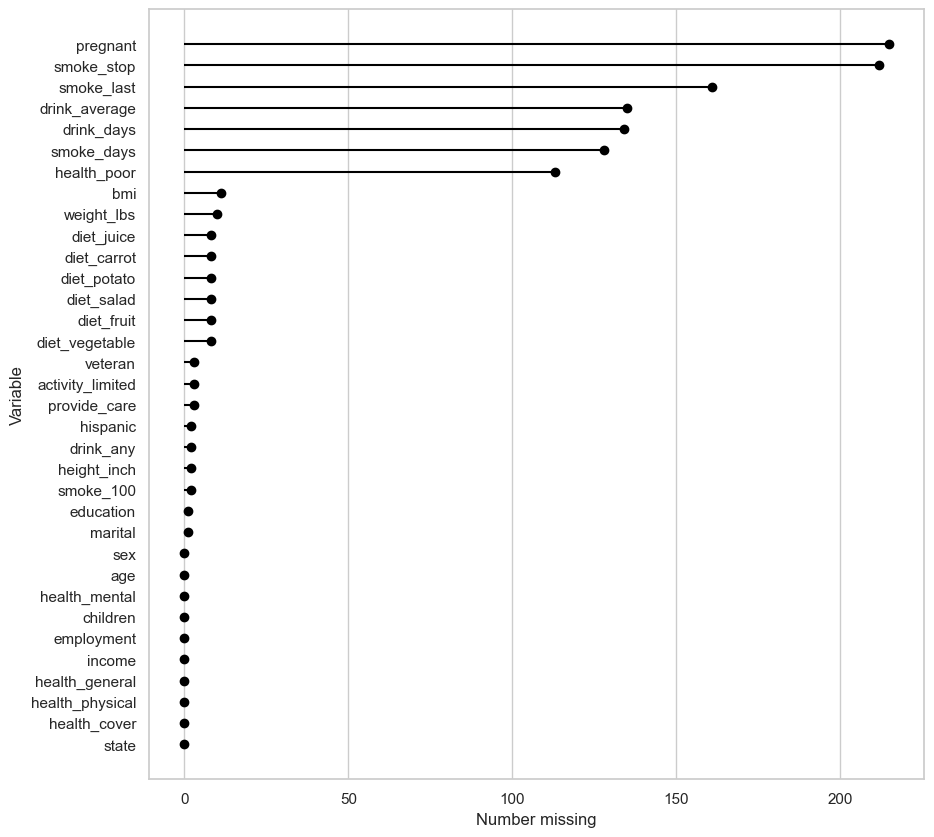

In [103]:
riskfactors_df.missing.missing_variable_plot()



- `missing_variable_plot()`: Al ejecutar este método, se genera un gráfico que muestra el número de valores faltantes en cada columna del DataFrame. Cada columna se representa como una línea horizontal, y la longitud de esta línea indica la cantidad de datos faltantes en esa columna.




### Casos / Observaciones / Filas

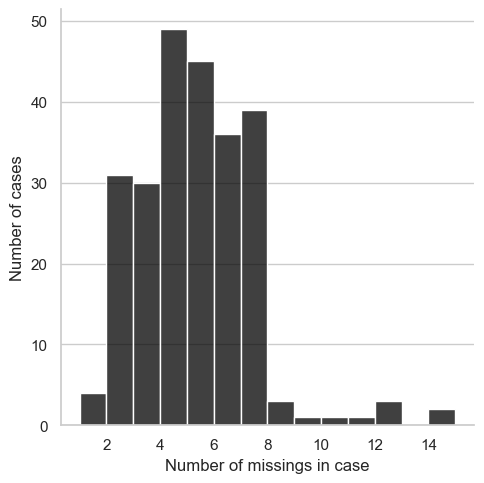

In [104]:
riskfactors_df.missing.missing_case_plot()



- `missing_case_plot()`: Al ejecutar este método, se genera un gráfico que muestra la distribución del número de valores faltantes en cada fila del DataFrame. Esto se hace típicamente a través de un histograma , donde el eje horizontal representa el número de valores faltantes en una fila y el eje vertical muestra el número de filas (casos) que tienen esa cantidad de valores faltantes.

- Esta visualización es útil para identificar si hay un patrón en la cantidad de datos faltantes a nivel de caso. Por ejemplo, puede ayudar a revelar si la mayoría de las filas tienen pocos o ningún valor faltante, o si hay muchas filas con una gran cantidad de datos faltantes.



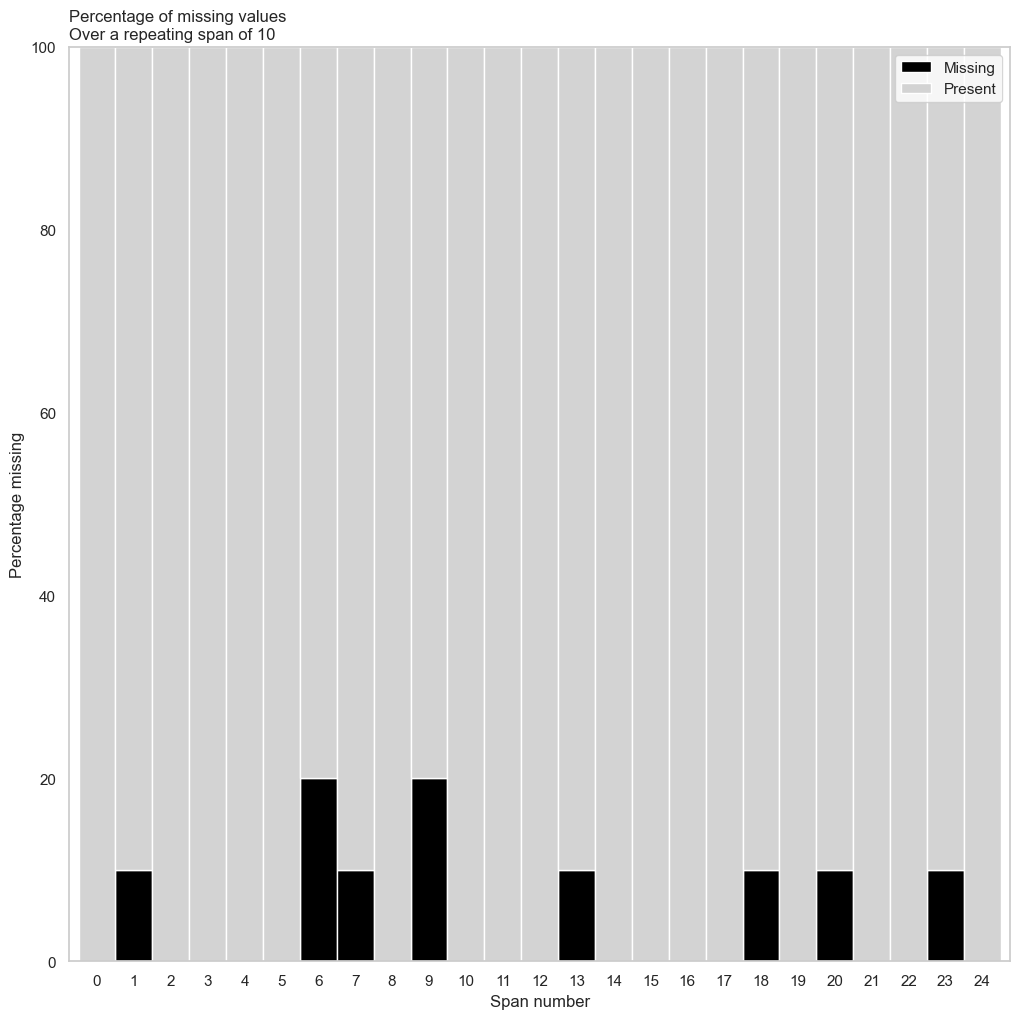

In [105]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable="weight_lbs",
        span_every=10,
        rot=0
    )
)

El método `riskfactors_df.missing.missing_variable_span_plot()` muestra la proporción de valores presentes y faltantes para una variable específica a lo largo de intervalos regulares en el DataFrame `riskfactors_df`:


- En este caso, el método se aplica a la variable `weight_lbs` con los siguientes parámetros:
  - `variable="weight_lbs"`: Especifica que la visualización se centrará en la variable `weight_lbs`.
  - `span_every=10`: Determina el tamaño de cada intervalo para el análisis. Aquí, se divide el conjunto de datos en segmentos de 10 filas, y se analiza la proporción de valores faltantes en cada segmento.
  - `rot=0: Este parámetro controla la rotación de las etiquetas en el eje X del gráfico. Un valor de 0` significa que las etiquetas no estarán rotadas.

El gráfico resultante proporciona una representación visual de la proporción de valores presentes y faltantes en segmentos de 10 filas para la variable weight_lbs. Cada segmento (o 'span') se muestra en el eje X, mientras que el porcentaje de valores presentes y faltantes se muestra en el eje Y.




<AxesSubplot:>

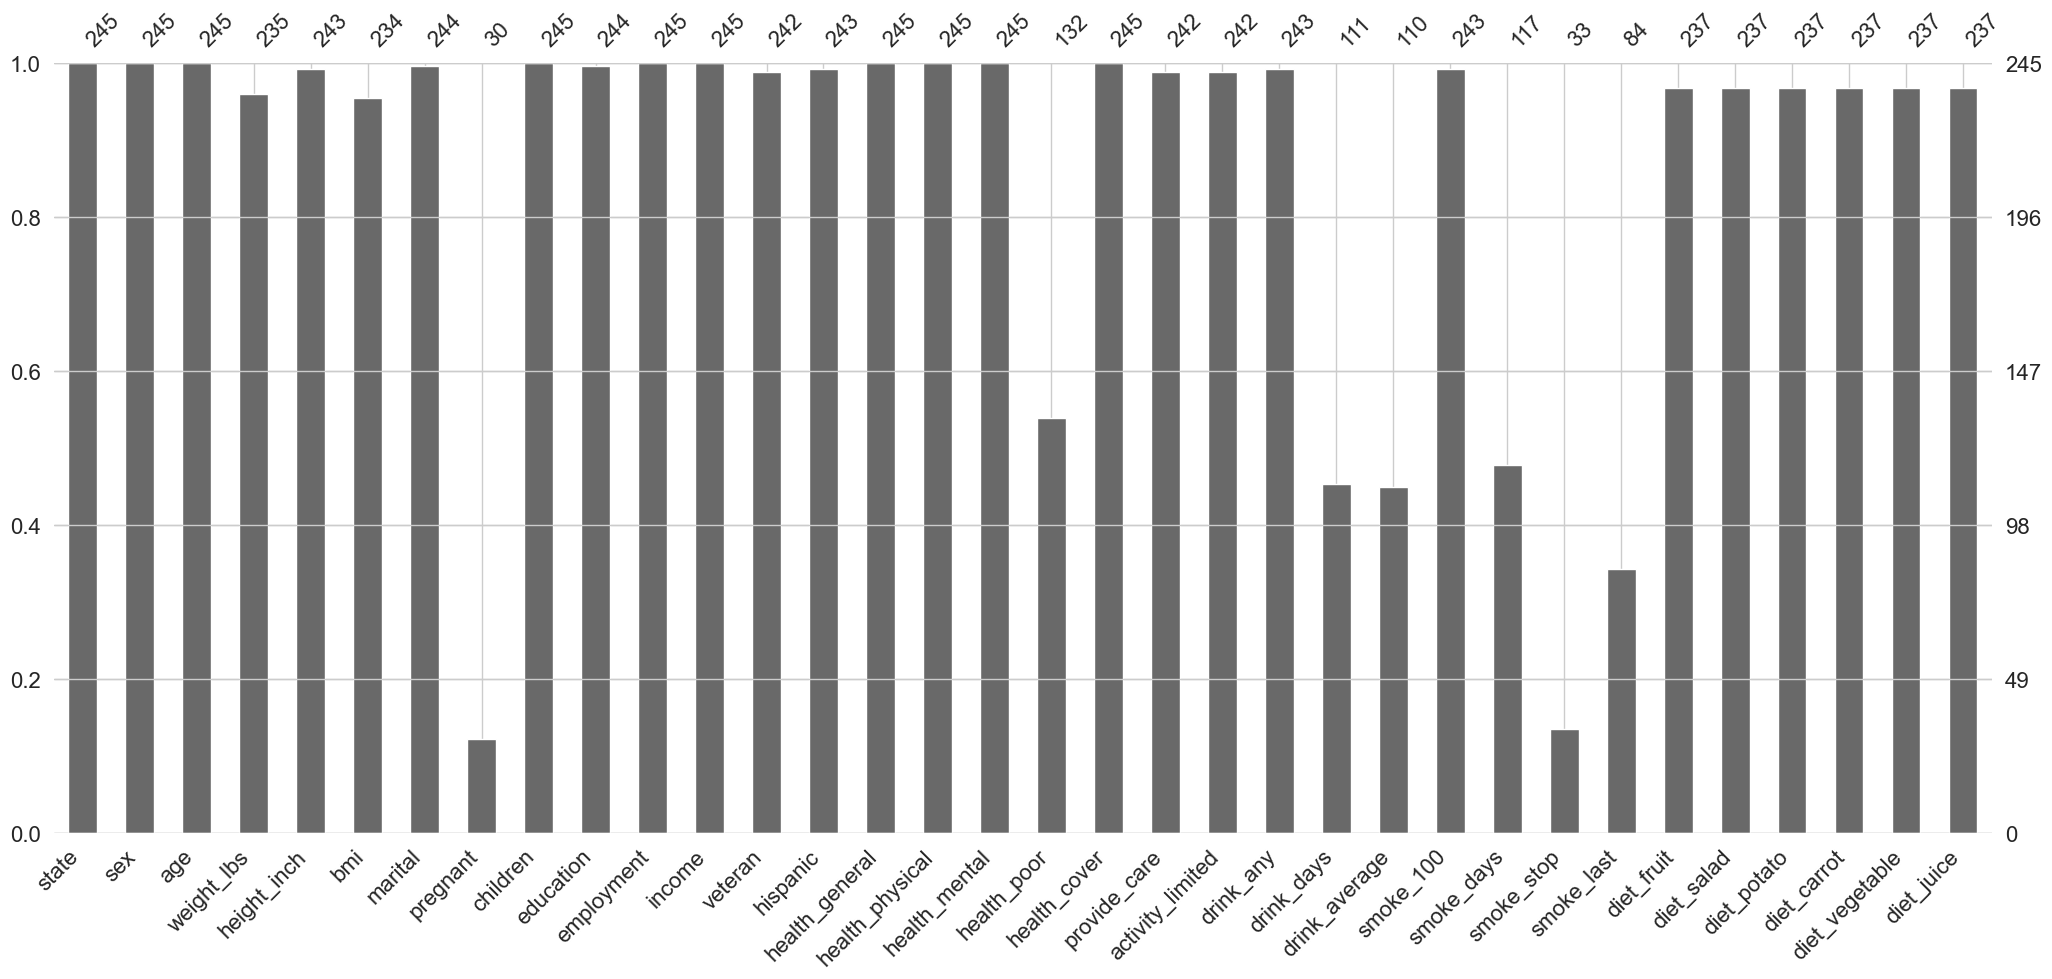

In [106]:
missingno.bar(df = riskfactors_df)

El comando `missingno.bar(df = riskfactors_df)` utiliza la biblioteca `missingno` para crear un gráfico de barras que visualiza la integridad de los datos en el DataFrame `riskfactors_df`:

- `missingno` es una biblioteca especializada en la visualización de datos faltantes en Python. Ofrece varias herramientas gráficas que ayudan a comprender la extensión y la distribución de los valores faltantes en un conjunto de datos.

- El método `bar()` de `missingno` crea un gráfico de barras donde cada barra representa una columna en el DataFrame `riskfactors_df`. La longitud de la barra indica el número de valores no faltantes en esa columna.



<AxesSubplot:>

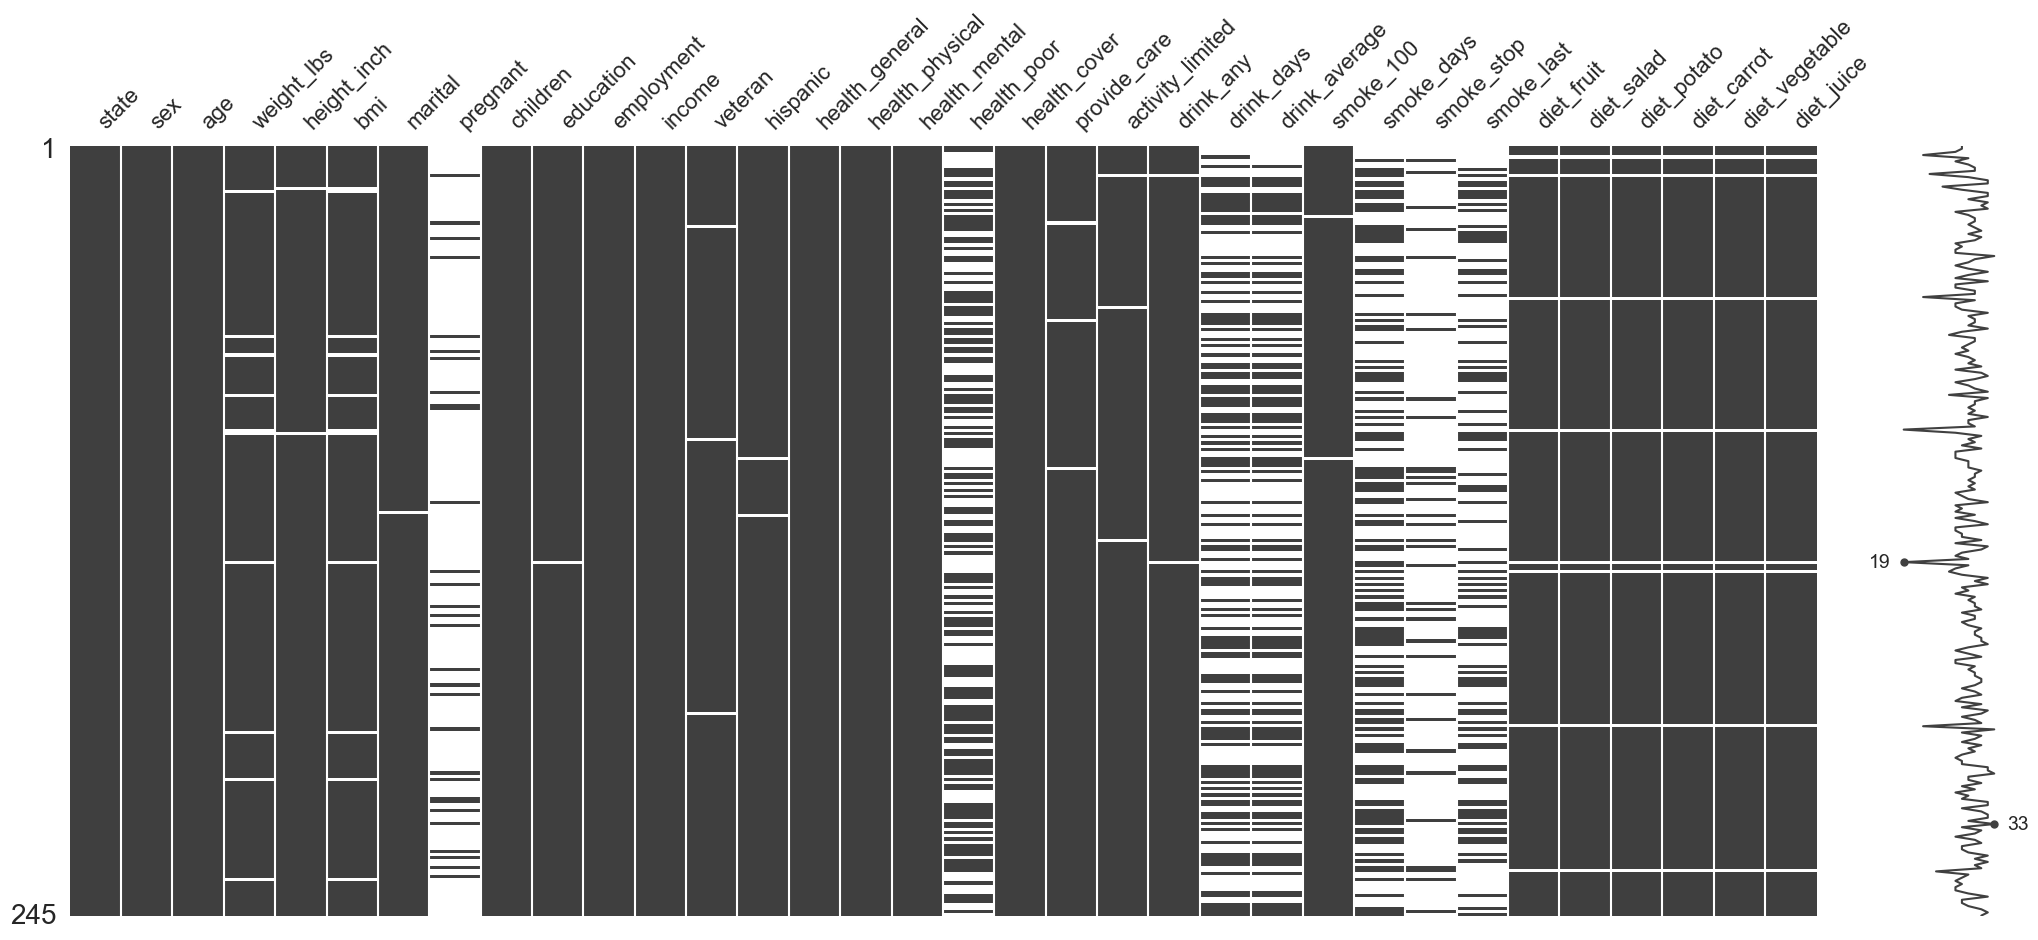

In [107]:
missingno.matrix(df=riskfactors_df)

El comando `missingno.matrix(df=riskfactors_df)` genera una visualización matricial utilizando la biblioteca `missingno` para representar los valores faltantes en el DataFrame `riskfactors_df`:


- El método `matrix()` de `missingno` crea una matriz gráfica donde las filas representan las entradas (registros) del DataFrame y las columnas representan las variables.

- En esta matriz, los valores no faltantes se muestran como líneas horizontales marcadas en cada columna, y los valores faltantes se visualizan como espacios en blanco. Esto permite identificar rápidamente patrones en la aparición de valores faltantes en el conjunto de datos.


/Users/ivanozono/Proyects/missing_values_detection/venv/lib/python3.10/site-packages/upsetplot/plotting.py:783: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['#0000002e' 'black' '#0000002e' ... '#0000002e' '#0000002e' '#0000002e']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
/Users/ivanozono/Proyects/missing_values_detection/venv/lib/python3.10/site-packages/upsetplot/plotting.py:784: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'solid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["linestyle"].fillna("solid", inplace=True)


{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

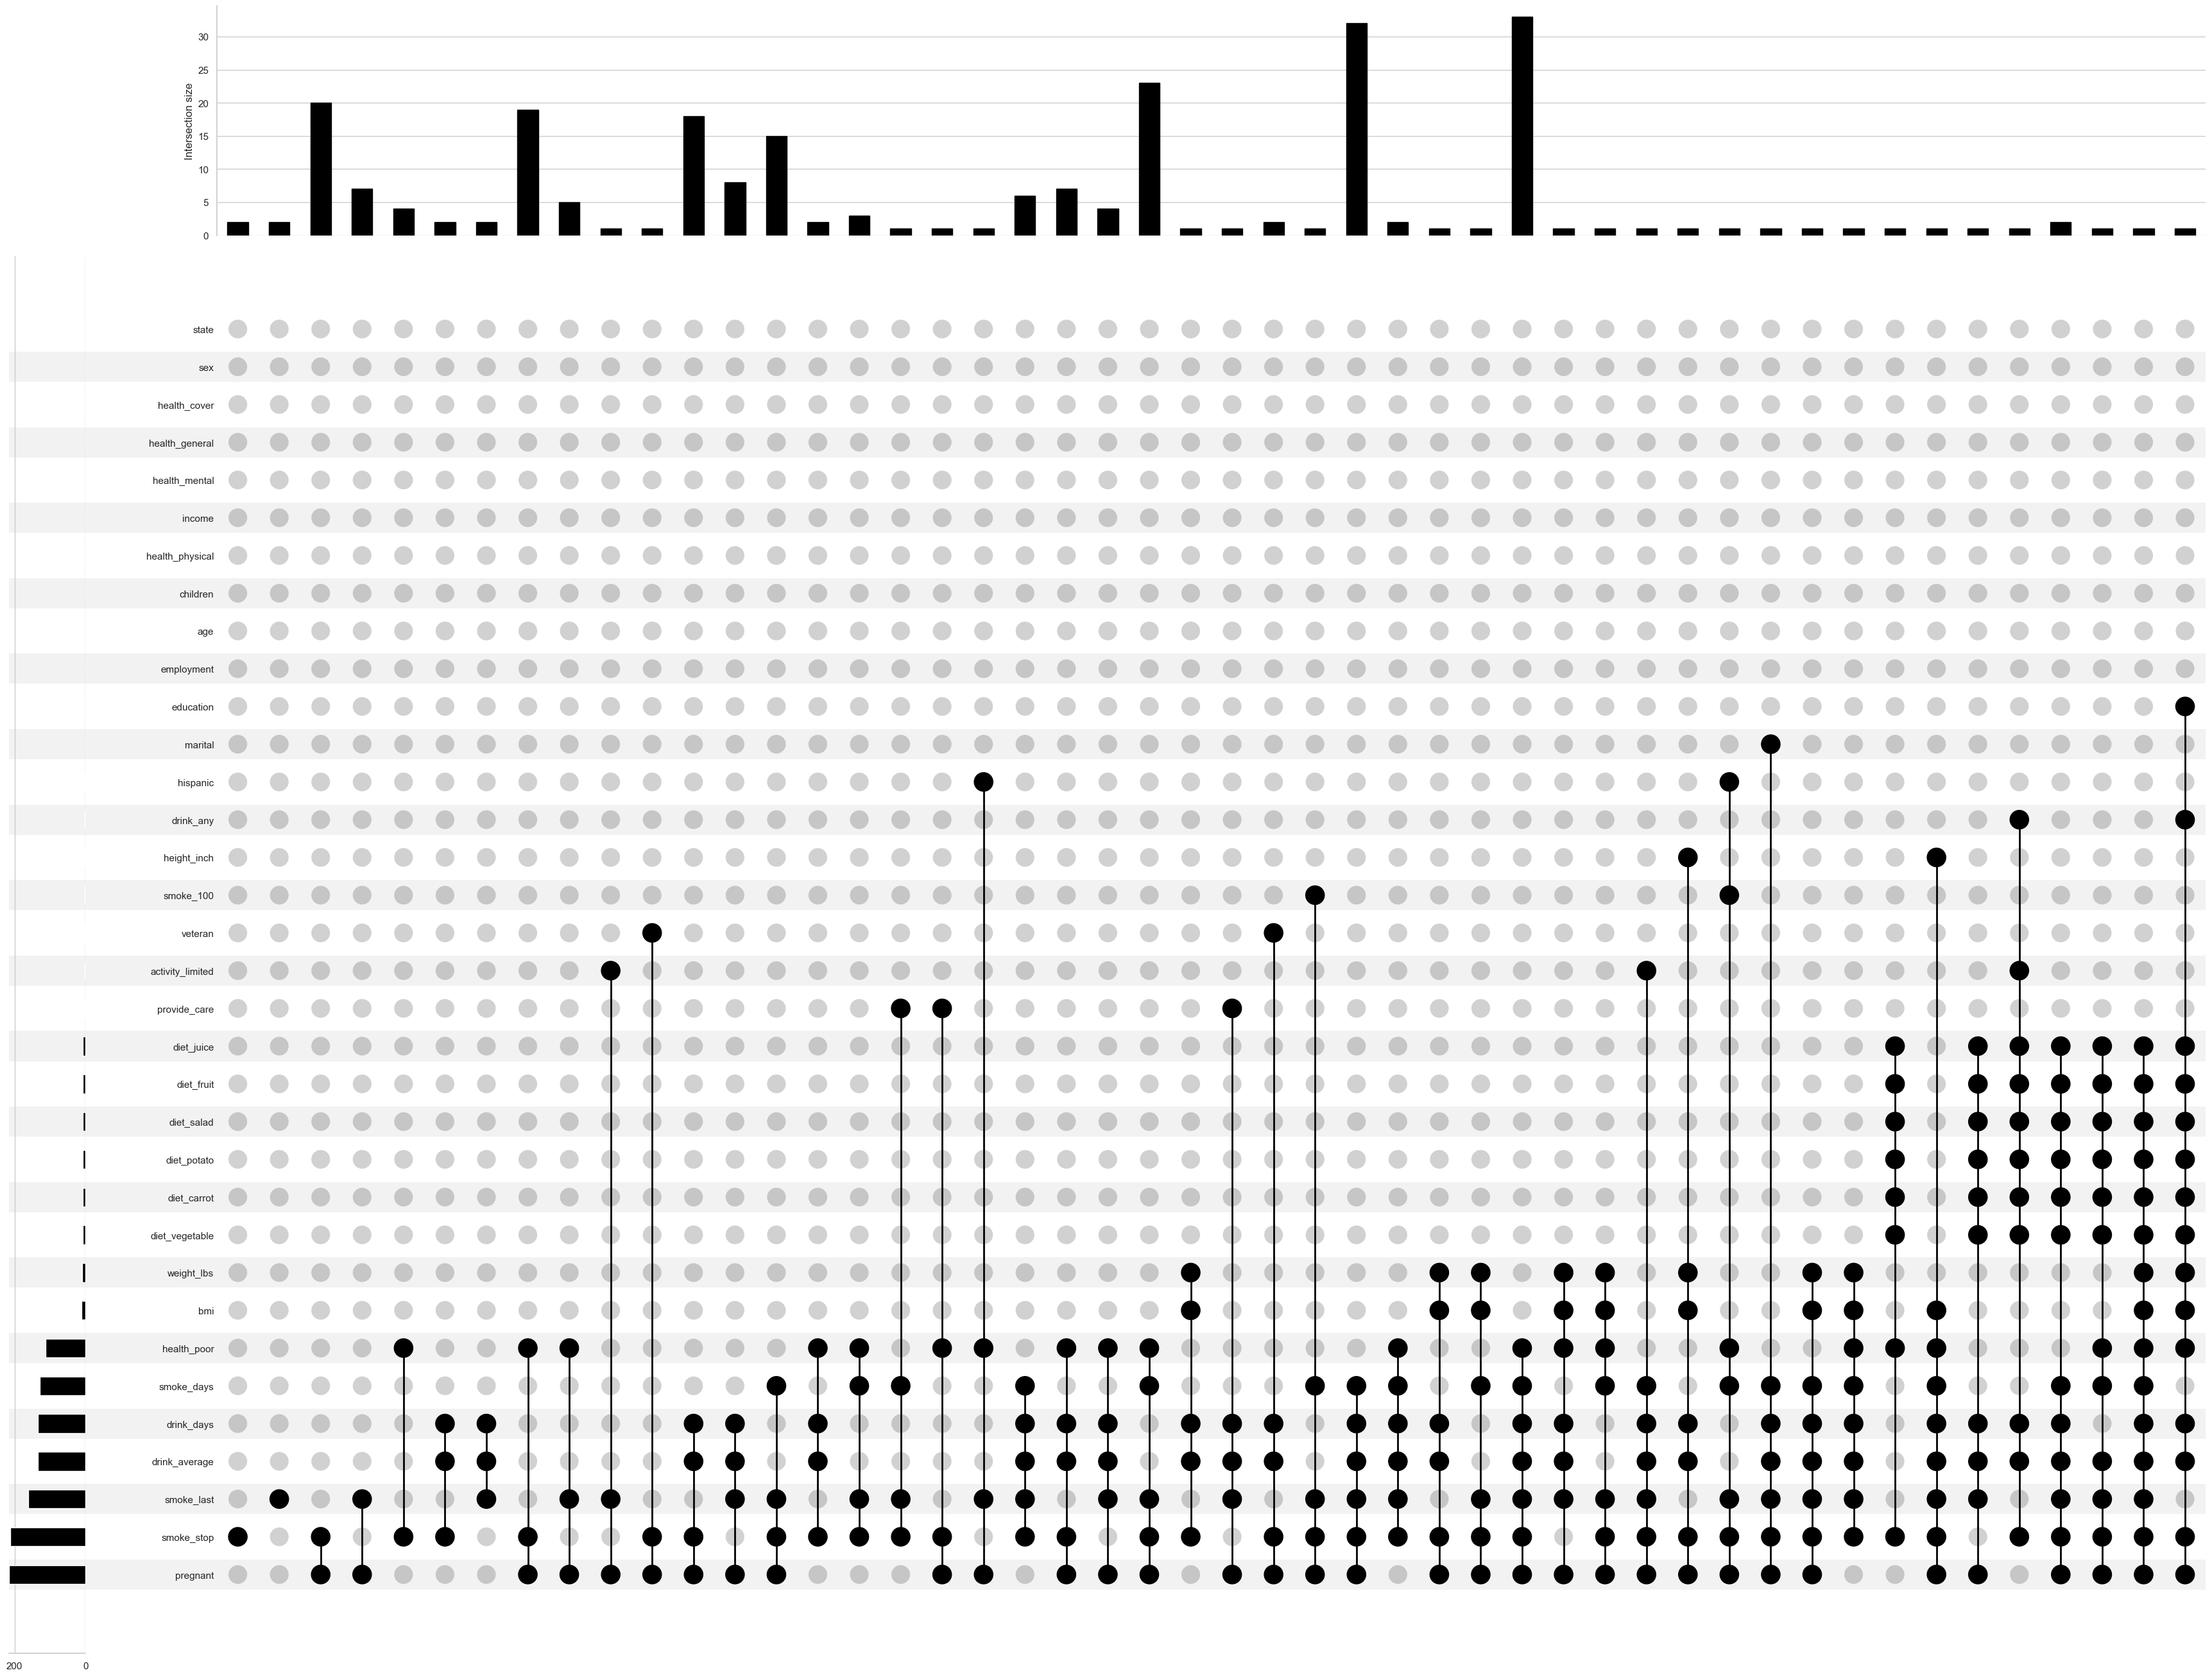

In [108]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = None,
        element_size = 60
    )
)


El método `missing_upsetplot` del DataFrame `riskfactors_df` se utiliza para generar un gráfico de UpSet, proporcionando una visualización avanzada de la intersección de los valores faltantes en múltiples columnas:

- `riskfactors_df.missing.missing_upsetplot()`: Este método forma parte de la extensión personalizada de Pandas para el análisis de datos faltantes, similar a los métodos `missing_variable_plot` y `missing_case_plot`. Un gráfico de UpSet es particularmente útil para visualizar intersecciones complejas y patrones en conjuntos de datos grandes.

- `variables = None`: Este parámetro indica que el gráfico incluirá todas las columnas del DataFrame por defecto. Si se especifican nombres de columna, el gráfico se limitará solo a esas columnas.

- `element_size = 60`: Controla el tamaño de cada elemento en el gráfico, lo que afecta a la legibilidad y la claridad visual del gráfico final.

- Un gráfico de UpSet muestra las intersecciones de conjuntos, representando en este caso las columnas del DataFrame donde ocurren valores faltantes. Proporciona una perspectiva única sobre cómo los patrones de datos faltantes se solapan entre diferentes variables.



## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [109]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)



- `common_na_strings` incluye una variedad de cadenas de texto que comúnmente se utilizan para representar valores faltantes en los datos. Estos incluyen variaciones de "NA" (como "NA", "N A", "N/A", etc.), "null", cadenas vacías, y otros marcadores como "?", "*", y ".".

La inclusión de múltiples variaciones, incluyendo diferencias en mayúsculas y minúsculas, espacios, y caracteres especiales, asegura una cobertura amplia de posibles representaciones de valores faltantes que podrían encontrarse en un conjunto de datos.


#### Números

In [110]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

Definimos `common_na_numbers`, una tupla que contiene una lista de números comúnmente utilizados para representar valores faltantes en los datos numéricos:

- `common_na_numbers` incluye una serie de números específicos como `-9`, `-99`, `-999`, `-9999`, `9999`, `66`, `77`, `88`, y `-1`. Estos números son a menudo utilizados en conjuntos de datos para indicar la ausencia de un valor válido, especialmente en contextos donde el uso de `NaN` no es posible o no se prefirió.

- Algunos sistemas o prácticas de recopilación de datos utilizan estos números como marcadores de lugar para valores faltantes, en particular en estudios o bases de datos más antiguas donde las convenciones para representar valores faltantes no estaban estandarizadas.

- Al igual que con las cadenas de texto para valores faltantes, estos números pueden ser identificados y tratados como valores faltantes durante el preprocesamiento de los datos. Esto asegura que los análisis posteriores no se vean sesgados o afectados por estos marcadores, que de otro modo podrían interpretarse erróneamente como valores válidos.

- Definir una lista estándar de números que representan valores faltantes ayuda a mantener la integridad y la consistencia del análisis de datos, especialmente cuando se trabaja con conjuntos de datos que provienen de múltiples fuentes o que tienen diferentes convenciones de codificación de datos faltantes.


### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [111]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


Creamos `missing_data_example_df`, un DataFrame de Pandas que ilustra un ejemplo de cómo se pueden representar los datos faltantes en un conjunto de datos real:

- Utilizamos `pd.DataFrame.from_dict` para crear el DataFrame a partir de un diccionario. Este método es útil para construir rápidamente DataFrames a partir de estructuras de datos sencillas.

- El diccionario contiene tres listas correspondientes a tres columnas (`x`, `y`, `z`), cada una con diferentes representaciones de valores faltantes:
  - En la columna `x`, los valores faltantes están representados por el número `-99` y la cadena `"NA"`.
  - En la columna `y`, usamos la cadena `"N/A"` junto con otras cadenas regulares para representar categorías.
  - La columna `z` contiene números donde `-100`, `-99`, y `-1` podrían interpretarse como valores faltantes, según las convenciones que hemos establecido previamente.

- Al crear `missing_data_example_df`, demostramos cómo los valores faltantes pueden estar presentes en los datos de diferentes maneras, y cómo pueden variar entre columnas en el mismo DataFrame.




In [112]:
missing_data_example_df.missing.number_missing()

0

 El método`missing_data_example_df.missing.number_missing()` se utiliza para calcular el número total de valores faltantes en el DataFrame `missing_data_example_df`:

- Este método forma parte de la extensión personalizada de Pandas que hemos implementado para el análisis de datos faltantes. Calcula y devuelve el número total de entradas en el DataFrame que son consideradas valores faltantes.

- `number_missing()`: Examina todas las columnas del DataFrame y cuenta cuántos valores en el conjunto de datos son reconocidos como faltantes, basándose en los criterios establecidos para identificar valores faltantes.



#### Revisar tipos de datos

In [113]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

El atributo `missing_data_example_df.dtypes` se utiliza para mostrar los tipos de datos de cada columna en el DataFrame `missing_data_example_df`:

- `dtypes` es un atributo de los DataFrames de Pandas que proporciona una visión general de los tipos de datos almacenados en cada columna. Esto incluye tipos como `int`, `float`, `object` (para cadenas de texto y datos mixtos), `bool`, entre otros.



#### Revisar valores únicos de los datos

In [114]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

El método `missing_data_example_df.x.unique()` se utiliza para listar todos los valores únicos en la columna `x` del DataFrame `missing_data_example_df`:

- `unique()`: Este método de Pandas retorna un array de valores únicos en la columna especificada. Es útil para identificar rápidamente la diversidad de datos en una columna, incluyendo la presencia de posibles valores faltantes representados de manera inusual o atípica.

- Al aplicarlo a la columna `x` de `missing_data_example_df`, `missing_data_example_df.x.unique()` nos muestra todos los diferentes valores que aparecen en esa columna. Esto puede incluir tanto números válidos como representaciones de valores faltantes (como `-99` o `"NA"` si están presentes en los datos).



In [115]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

El fragmento de código `missing_data_example_df.select_dtypes(object).apply(pd.unique)` se utiliza para identificar todos los valores únicos en las columnas de tipo `object` del DataFrame `missing_data_example_df`:

- `select_dtypes(object)`: Este método de Pandas selecciona todas las columnas del DataFrame que son del tipo `object`. Las columnas de tipo `object` generalmente contienen datos de tipo string o una mezcla de diferentes tipos, incluyendo textos y valores faltantes representados como cadenas.

- `.apply(pd.unique)`: Después de seleccionar las columnas de tipo `object`, `apply(pd.unique)` se utiliza para aplicar la función `pd.unique` a cada una de estas columnas. Esto devuelve los valores únicos presentes en cada columna.

- Al combinar `select_dtypes` con `apply(pd.unique)`, obtenemos un resumen de todos los valores únicos en las columnas de tipo `object` del DataFrame. Esto es especialmente útil para la identificación rápida de categorías, etiquetas únicas y representaciones de valores faltantes en forma de texto.


### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

In [116]:
pd.read_csv(
    "./data/missing_data_enconding_example.csv",
    na_filter=True,
    na_values=[-99, -1]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


El método `pd.read_csv` se utiliza aquí para cargar un archivo CSV, especificando cómo deben tratarse los valores faltantes: Este es el camino al archivo CSV que queremos leer. El archivo se encuentra en la carpeta data y se llama missing_data_enconding_example.csv.

`na_filter=True` : Este parámetro activa el filtrado de valores faltantes. Con na_filter configurado en True, Pandas detectará automáticamente los valores faltantes (como cadenas vacías o NaN).

`na_values=[-99, -1]` : Aquí definimos una lista de valores adicionales que deben ser tratados como valores faltantes. En este caso, le estamos diciendo a Pandas que trate -99 y -1 como valores faltantes. Esto es útil cuando los datos utilizan códigos numéricos específicos para indicar datos no disponibles o faltantes.




#### Sustitución global

In [117]:
(
    missing_data_example_df
    .replace(
        
        to_replace=[-99, "NA"],
        value=np.nan
    )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


Utilizamos el método `replace` en `missing_data_example_df` para convertir representaciones específicas de valores faltantes a `np.nan`, estandarizando así su tratamiento:

- `to_replace=[-99, "NA"]`: Identificamos `-99` y `"NA"` como valores a ser reemplazados. Estos pueden ser códigos numéricos o textuales que se utilizan en el conjunto de datos para representar valores faltantes.

- `value=np.nan`: Sustituimos los valores identificados en `to_replace` por `np.nan`, que es la representación estándar de Pandas para los datos faltantes.

Esta operación es crucial para la limpieza y preparación de datos, ya que garantiza que los valores faltantes sean reconocidos y manejados consistentemente en análisis posteriores.


#### Sustitución dirigida

In [118]:
(
    missing_data_example_df
    .replace(
        to_replace={
            "x": {
                -99: np.nan
            }
        }
    )
)

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


Utilizamos `replace` en `missing_data_example_df` para cambiar valores específicos en la columna `x` a `np.nan`, lo que contribuye a una representación estandarizada de los valores faltantes:

- La operación de reemplazo se dirige específicamente a la columna `x` del DataFrame, donde `-99` se identifica como un marcador de valor faltante.

- Se utiliza un diccionario en `to_replace` para indicar que solo en la columna `x` se debe hacer el cambio, reemplazando `-99` por `np.nan`.

Este método selectivo es particularmente útil cuando diferentes columnas tienen diferentes indicadores o no requieren el mismo tratamiento para los valores faltantes.


## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [119]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


El DataFrame `implicit_to_explicit_df` se crea para demostrar cómo se pueden representar datos tanto implícitos como explícitos:

- Se utiliza `pd.DataFrame.from_dict` con un diccionario que define tres columnas: `name`, `time`, y `value`. Cada clave del diccionario corresponde a una columna del DataFrame, y las listas asociadas representan los datos de cada columna.

- Las columnas `name` y `time` contienen datos categóricos (nombres y momentos del día), mientras que la columna `value` incluye datos numéricos, con un np.nan para representar un valor faltante.

Este DataFrame es un ejemplo claro de cómo se pueden combinar diferentes tipos de datos en un solo conjunto, incluyendo la representación explícita de valores faltantes en los datos numéricos.


### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

In [120]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index="name",
        names_from="time",
        values_from="value"
    )
)

/Users/ivanozono/Proyects/missing_values_detection/venv/lib/python3.10/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.pivot` instead.
  return method(self._obj, *args, **kwargs)


,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


Utilizamos el método `pivot_wider` en `implicit_to_explicit_df` para reestructurar el DataFrame, transformando datos de formato largo a formato ancho:

- `pivot_wider` es similar a la función `pivot` en Pandas y se utiliza para cambiar la forma de los datos. En este caso, transforma el DataFrame de un formato en el que cada fila es una observación (formato largo) a un formato en el que cada columna representa una categoría o tiempo del día (formato ancho).

- Los parámetros de `pivot_wider` son:
  - `index="name"`: Especifica la columna cuyos valores serán las filas del nuevo DataFrame.
  - `names_from="time"`: Indica que los valores únicos de la columna `time` se convertirán en columnas separadas en el DataFrame resultante.
  - `values_from="value"`: Define que los valores de la columna `value` se redistribuirán en las nuevas columnas creadas a partir de `time`.

- Este tipo de transformación es útil para análisis en los que es más conveniente tener una columna para cada categoría de tiempo, lo que facilita comparaciones directas y otros tipos de análisis estadístico.



#### Cuantificar ocurrencias de n-tuplas

In [121]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=["name"]
    )
    .reset_index(name="n")
    .query("n < 2")
)

,name,n
1,zelda,1


El  código demuestra cómo contar y filtrar las ocurrencias de valores únicos en la columna `name` del DataFrame `implicit_to_explicit_df`:

Primero, usamos value_counts en la columna name para contar las frecuencias de cada nombre único en esta columna.

subset=["name"]: Especifica que estamos interesados solo en contar los valores únicos en la columna name.

reset_index(name="n"): Convertimos la Serie resultante en un DataFrame y renombramos la columna de conteo a "n". Esto nos permite trabajar con los conteos como una columna regular en el DataFrame.

Finalmente, utilizamos query("n < 2") para filtrar y retener solo aquellas filas donde el conteo es menor que 2. Esto nos ayuda a identificar los nombres que aparecen menos de dos veces en el DataFrame.

Este método es útil para identificar valores únicos con baja frecuencia en los datos, lo cual puede ser importante en ciertos análisis, como la identificación de categorías raras o la limpieza de datos.

### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

In [122]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


El método `complete` se utiliza en `implicit_to_explicit_df` para crear un DataFrame que incluya todas las combinaciones posibles de los valores en las columnas `name` y `time`, llenando con valores faltantes donde no existan datos complete("name", "time")


En el contexto de datos tabulares, hay situaciones donde es útil tener un registro de todas las combinaciones posibles de ciertas variables, incluso si algunas de esas combinaciones no están presentes en los datos originales. Esto es especialmente relevante en análisis que requieren una representación completa de todas las posibilidades, como en ciertos tipos de modelado estadístico o en la preparación de datos para técnicas de visualización.


#### Limitar la exposición de n-tuplas de valores faltantes

In [123]:
(
    implicit_to_explicit_df
    # pyjanitor
    .complete(
        {"name": ["lynn", "zelda"]},
        {"time": ["morning", "afternoon"]},
        sort=True
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


El método `complete` de la biblioteca `pyjanitor` se utiliza en este caso para expandir el DataFrame `implicit_to_explicit_df`, creando un conjunto de datos completo con todas las combinaciones de valores específicos en las columnas `name` y `time`

- Este método es útil para casos en los que queremos asegurarnos de que nuestro DataFrame contenga todas las combinaciones posibles de ciertos valores. En este caso, se especifican combinaciones particulares de los valores en las columnas `name` y `time`.

- Se pasa un diccionario para cada una de las columnas `name` y `time`, especificando los valores que queremos que aparezcan en cada combinación. Por ejemplo, `{"name": ["lynn", "zelda"]}` indica que queremos filas para cada uno de estos nombres.

- `sort=True` se utiliza para ordenar el DataFrame resultante basado en las columnas especificadas. Esto ayuda a organizar los datos de manera más legible, especialmente útil cuando el DataFrame resultante se utiliza para análisis posteriores o visualizaciones.

- El DataFrame resultante incluirá todas las combinaciones posibles de los valores especificados en `name` y `time`, con datos faltantes llenados apropiadamente. Esta técnica es esencial en la preparación de datos para análisis que requieren una representación completa y ordenada de todas las posibles combinaciones de ciertas variables.


#### Rellenar los valores faltantes

In [124]:
(
    implicit_to_explicit_df
    # pyjanitor
    .complete(
        "name",
        "time",
        fill_value=np.nan
    )
)

/Users/ivanozono/Proyects/missing_values_detection/venv/lib/python3.10/site-packages/janitor/functions/complete.py:308: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  out = out.fillna(fill_value, downcast="infer")


,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN



El método `complete` de la biblioteca `pyjanitor` se utiliza aquí para expandir `implicit_to_explicit_df`, creando un conjunto de datos que incluye todas las combinaciones posibles de los valores en las columnas `name` y `time`:

- Este enfoque es útil cuando necesitamos un DataFrame que represente todas las posibles combinaciones de ciertos valores, incluso si algunas combinaciones no están presentes en los datos originales.

- Se especifican las columnas `name` y `time` para que el DataFrame resultante contenga todas las combinaciones únicas de sus valores.

- `fill_value=np.nan` indica que las combinaciones de `name` y `time` que no existían originalmente en el DataFrame se rellenarán con `np.nan`. Esto es importante para mantener la integridad de los datos, especialmente cuando se utilizan para análisis estadísticos o modelado, donde la ausencia de datos puede ser significativa.

- El DataFrame resultante proporciona una visión completa de todas las combinaciones posibles de `name` y `time`, con datos faltantes representados de manera explícita, lo cual es crucial para un análisis exhaustivo y para garantizar que no se pasen por alto posibles combinaciones de variables.

#### Limitar el rellenado de valores faltantes implícitos

In [125]:
(
    implicit_to_explicit_df
    # pyjanitor
    .complete(
        "name",
        "time",
        fill_value=0,
        explicit=False
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,0.0
5,zelda,night,0.0


El método `complete` de la biblioteca `pyjanitor` se utiliza en `implicit_to_explicit_df` para generar un DataFrame que incluya todas las combinaciones posibles de valores en las columnas `name` y `time`, con algunas especificaciones particulares

- Se especifica `fill_value=0`, lo que significa que para las combinaciones de `name` y `time` que no estaban originalmente presentes en el DataFrame, se rellenarán los espacios vacíos con el valor `0` en lugar de `np.nan`. Esto puede ser útil en situaciones donde se quiere evitar la introducción de valores faltantes y preferimos un valor numérico por defecto.

- `explicit=False`: Esta opción indica que el método `complete` solo debería crear combinaciones explícitas que estén presentes en los datos originales, en lugar de todas las combinaciones posibles. Es decir, en lugar de expandir el DataFrame para incluir cada combinación posible de `name` y `time`, solo se incluyen aquellas combinaciones que ya existen en los datos, rellenando los valores faltantes con `0`.

- Esta forma de utilizar `complete` es especialmente útil cuando queremos mantener la estructura original de los datos pero necesitamos asegurarnos de que todas las combinaciones existentes tengan un valor, aunque sea un valor por defecto como `0`.

## Tipos de valores faltantes

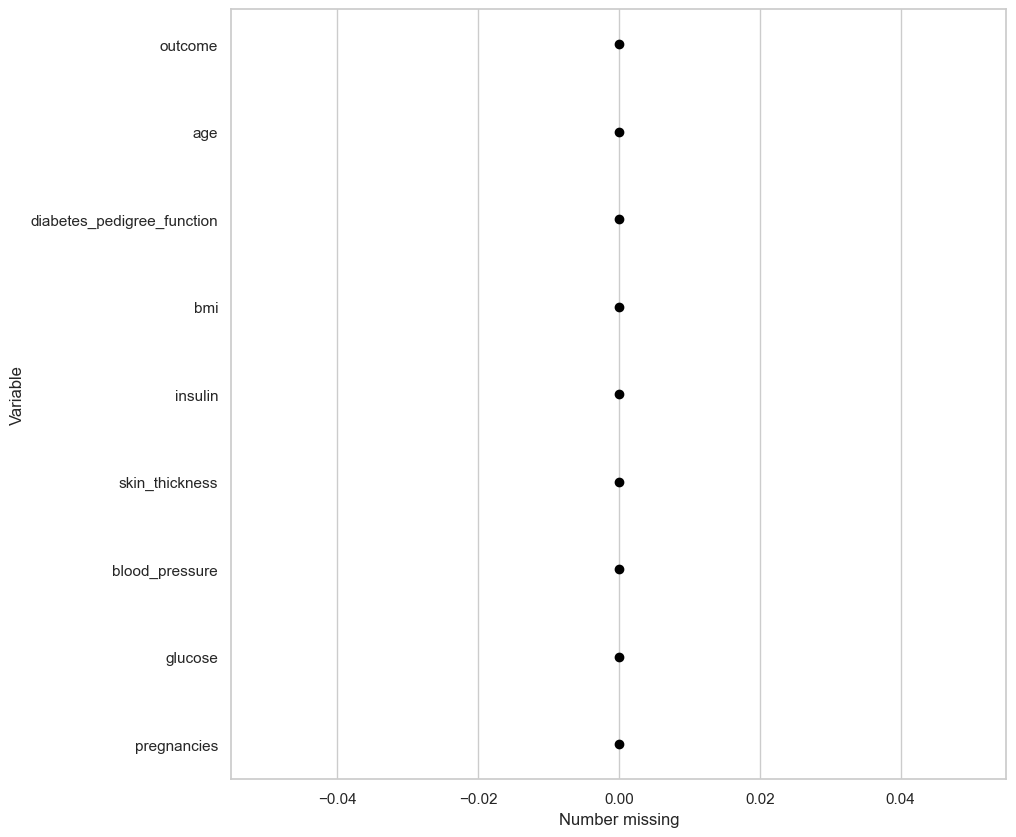

In [126]:
diabetes_df.missing.missing_variable_plot()

El método `missing_variable_plot()` se utiliza en el DataFrame `diabetes_df` para crear una visualización de los valores faltantes en cada variable (columna):

- Este método es parte de una extensión personalizada de Pandas que facilita el análisis de datos faltantes. Proporciona una herramienta visual para comprender mejor la distribución de los valores faltantes en el conjunto de datos.

- Al ejecutar `missing_variable_plot()`, se genera un gráfico que muestra el número de valores faltantes en cada columna del DataFrame `diabetes_df`. Cada columna se representa como una línea horizontal, y la longitud de esta línea indica la cantidad de datos faltantes en esa columna.

- La visualización resultante es útil para identificar rápidamente las columnas que tienen una cantidad significativa de valores faltantes. Esto puede influir en decisiones importantes sobre cómo manejar estos valores faltantes, como la necesidad de imputar datos, eliminar la columna, o investigar más a fondo las razones de estos valores faltantes.

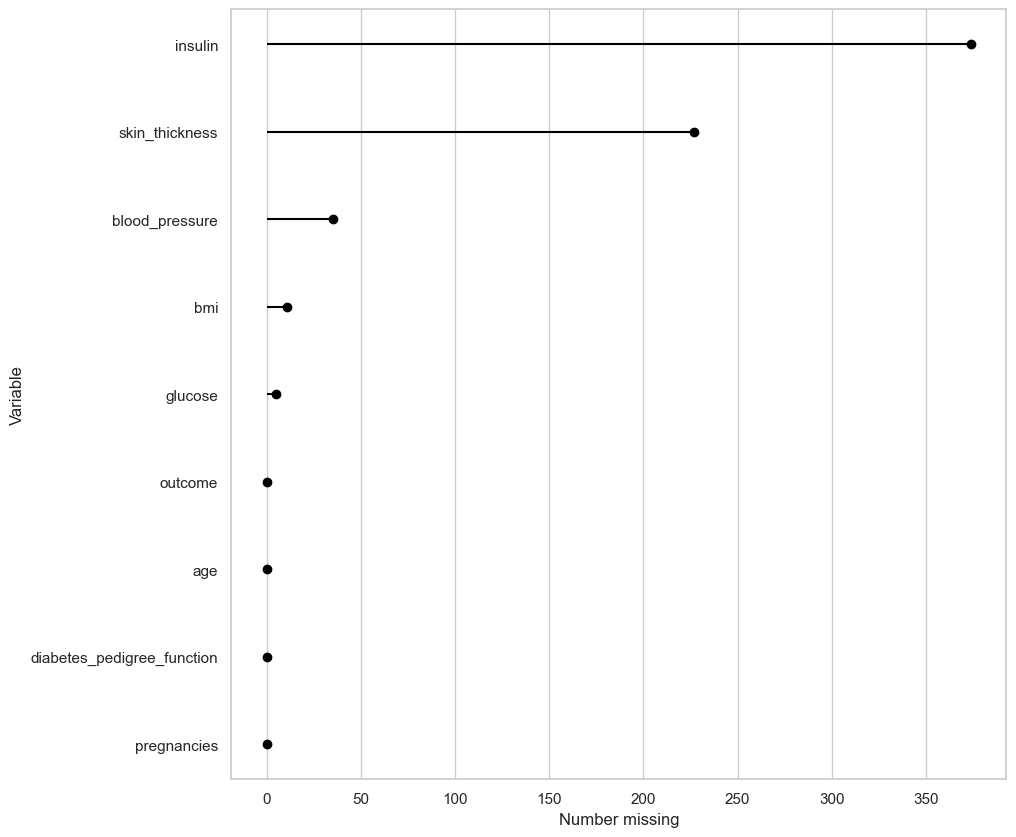

In [127]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.missing.missing_variable_plot()

Primero, se realiza una operación para reemplazar ciertos valores en el DataFrame `diabetes_df`, seguido de una visualización de los valores faltantes:

- La línea de código `diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)` se enfoca en las columnas del DataFrame `diabetes_df` desde la segunda hasta la sexta (índices 1 a 5). En estas columnas, se reemplazan todos los valores `0` por `np.nan`. Este paso es importante porque en algunos conjuntos de datos, especialmente en el contexto médico o biológico, un `0` puede ser utilizado para representar datos faltantes o no medidos.

- Tras este reemplazo, los ceros que originalmente podrían haber sido usados para representar valores faltantes ahora se manejan explícitamente como tales en el análisis.

- A continuación, se utiliza `diabetes_df.missing.missing_variable_plot()` para visualizar los valores faltantes en el DataFrame modificado. Este método crea un gráfico que muestra el número de valores faltantes en cada una de las columnas seleccionadas del DataFrame.

- La visualización resultante ayuda a comprender la extensión y la distribución de los valores faltantes en las columnas seleccionadas de `diabetes_df`. Esto es crucial para decidir cómo manejar estos valores faltantes en análisis estadísticos o modelados posteriores.

### _Missing Completely At Random_ (MCAR)

<AxesSubplot:>

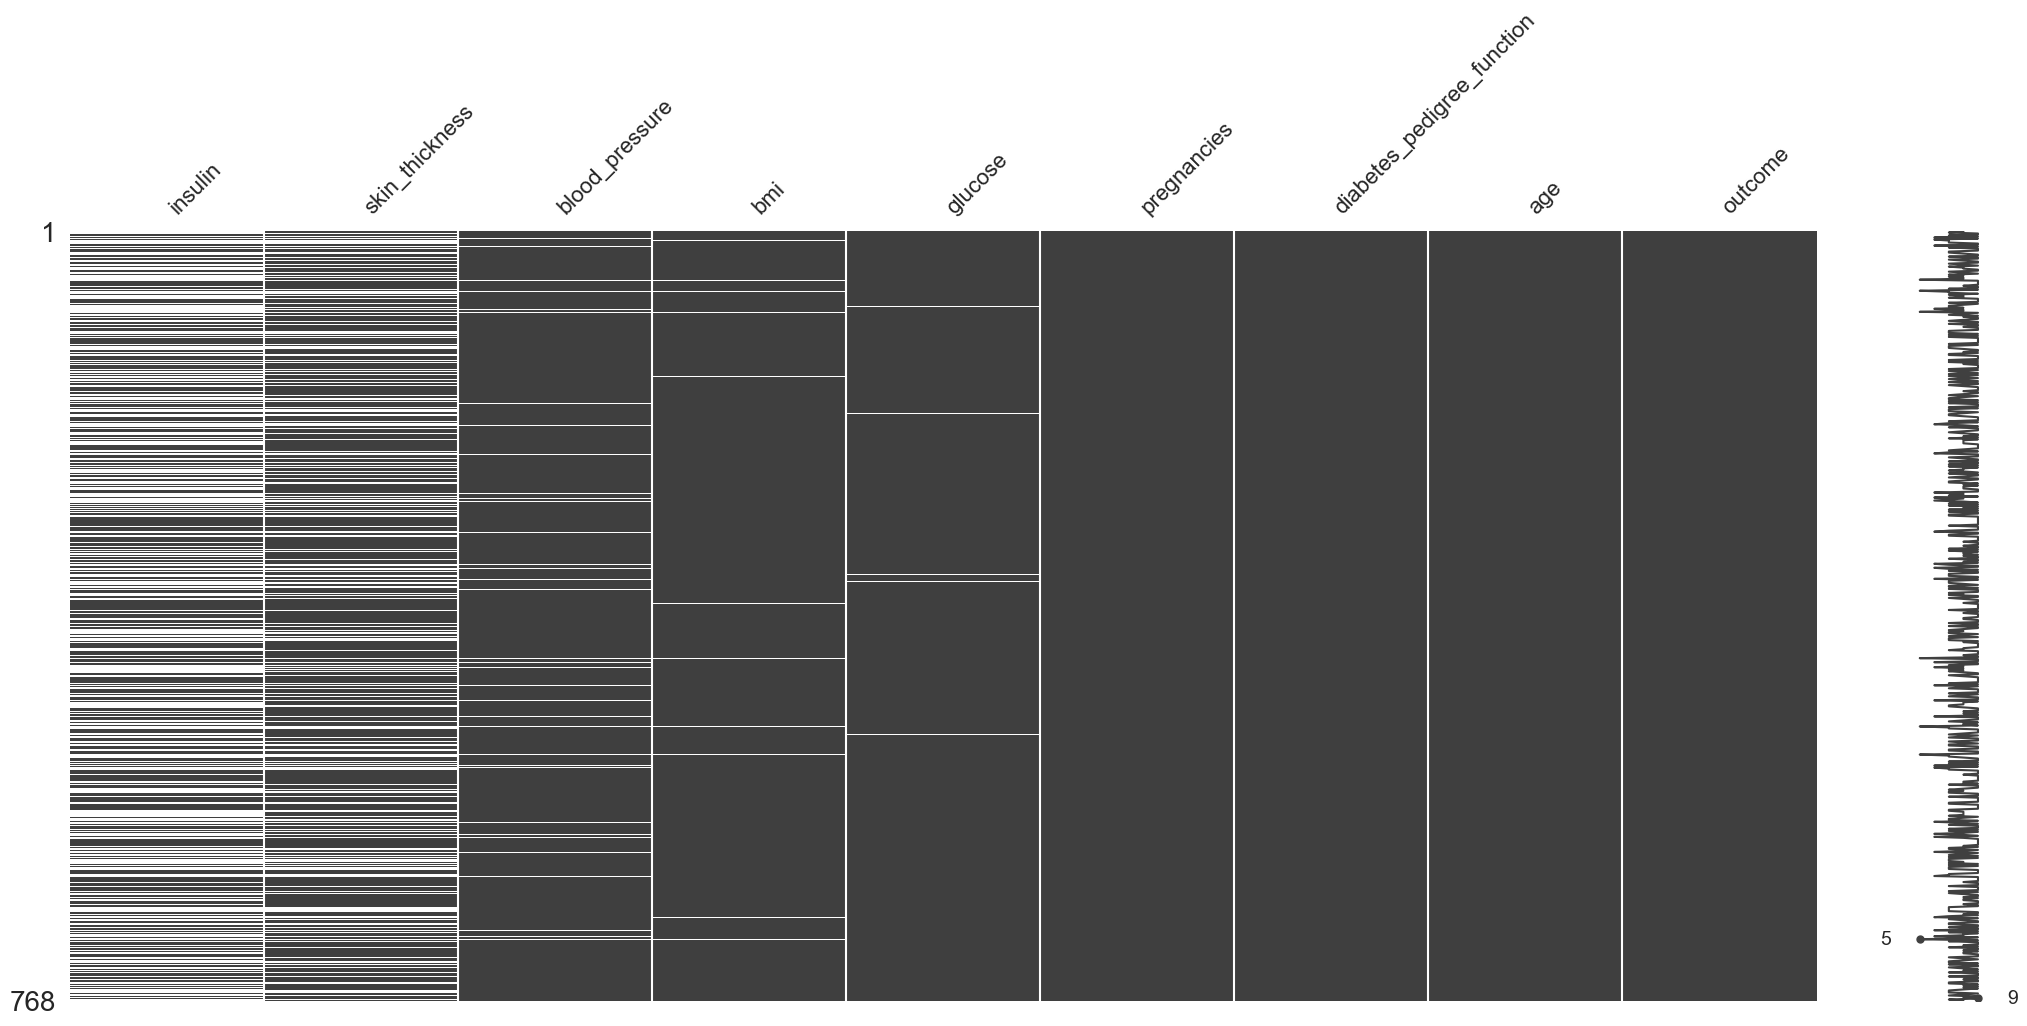

In [128]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

En este código, combinamos varias herramientas para analizar y visualizar los valores faltantes en `diabetes_df`

- Primero, utilizamos `diabetes_df.missing.sort_variables_by_missingness()` para reorganizar las columnas del DataFrame `diabetes_df` según la cantidad de valores faltantes que contienen. Esto significa que las columnas con más valores faltantes se mueven hacia el principio del DataFrame.

- La función `pipe(missingno.matrix)` se utiliza para pasar el DataFrame reorganizado a `missingno.matrix`. `missingno` es una biblioteca especializada en la visualización de valores faltantes. El método `matrix` genera una visualización gráfica donde las filas representan las observaciones y las columnas representan las variables, con los valores faltantes mostrados como espacios en blanco.

- La combinación de estos métodos permite ver no solo dónde están los valores faltantes, sino también cuáles variables tienen más datos faltantes. Esto facilita la identificación de patrones y puede ser particularmente útil para tomar decisiones sobre cómo manejar los valores faltantes, como la imputación de datos o la eliminación de variables con demasiados datos faltantes.

### _Missing At Random_ (MAR)

<AxesSubplot:>

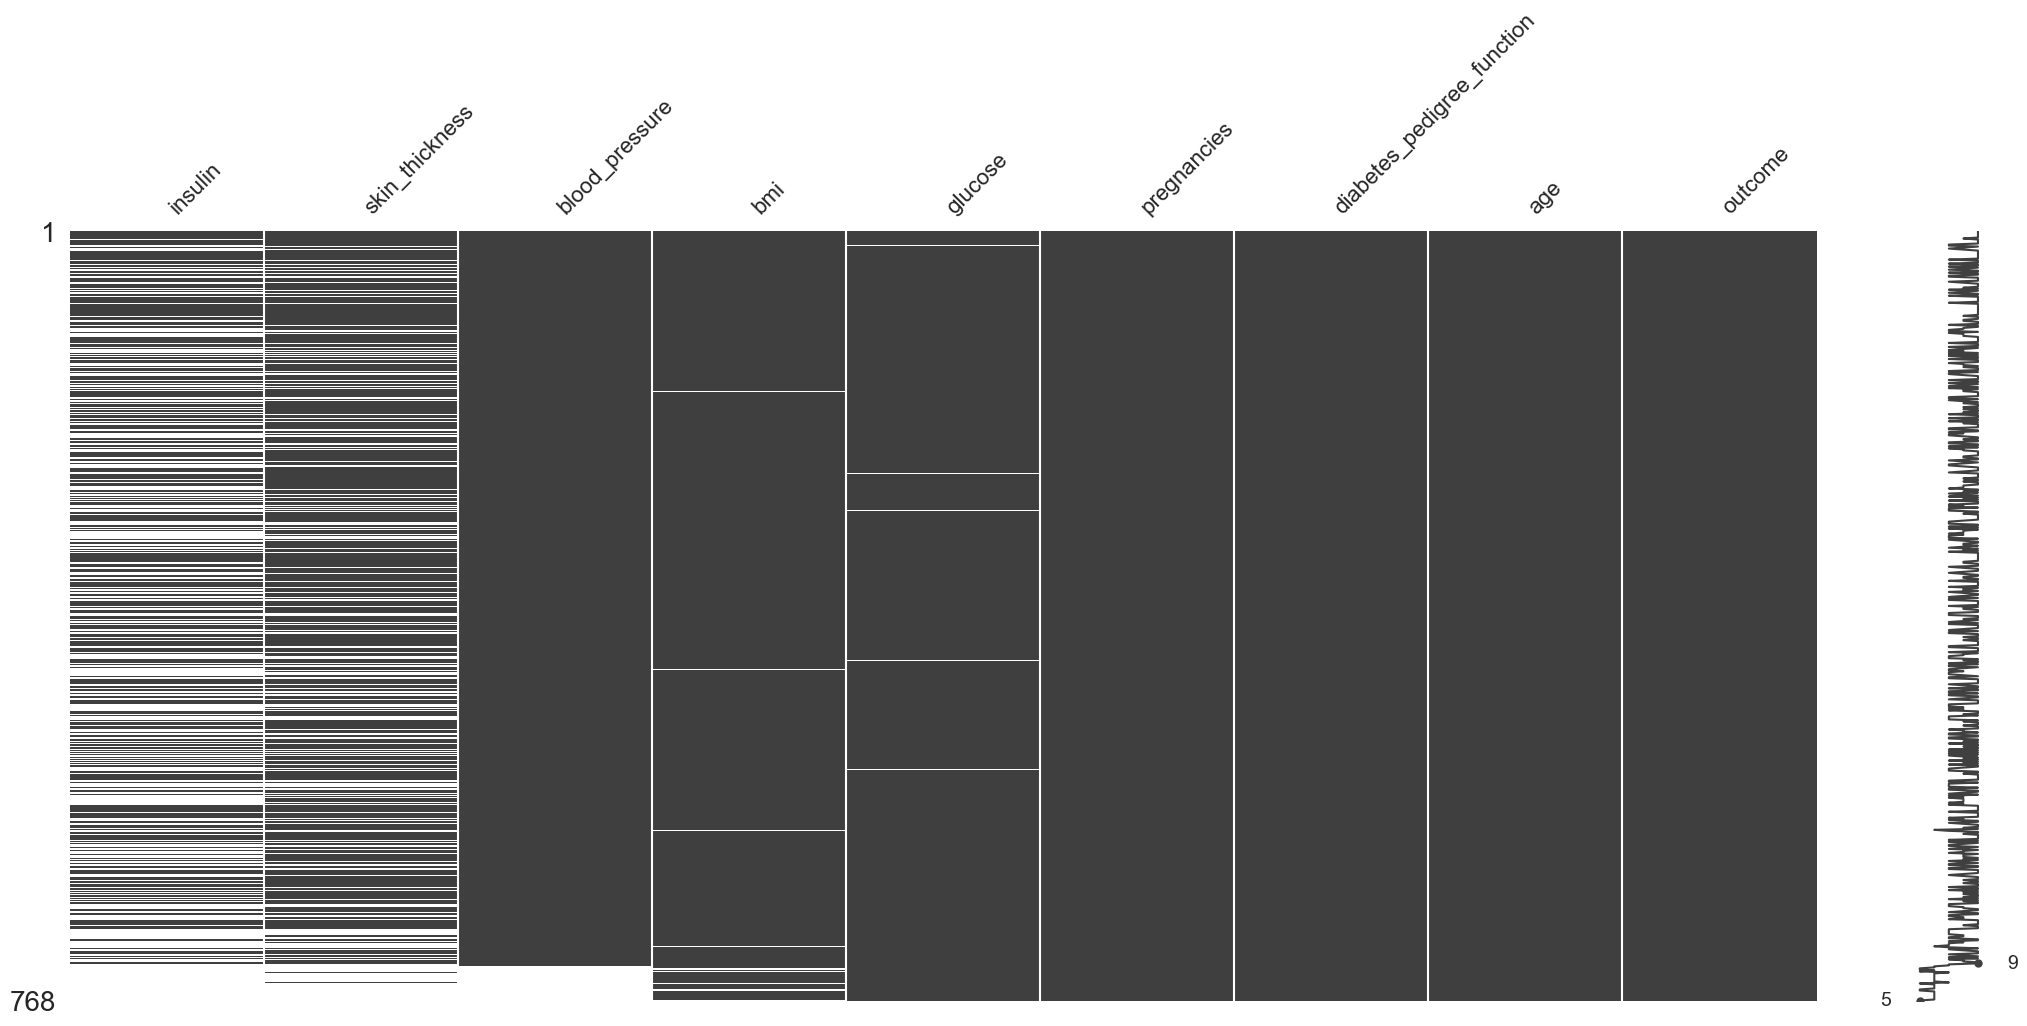

In [129]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by = "blood_pressure")
    .pipe(missingno.matrix)
)



En esta secuencia de comandos, se realiza un análisis detallado de los valores faltantes en `diabetes_df` con un enfoque específico en la columna `blood_pressure`, seguido de una visualización gráfica:

- Primero, aplicamos `missing.sort_variables_by_missingness()` a `diabetes_df`. Este método ordena las columnas del DataFrame en función del número de valores faltantes que contienen, colocando las columnas con más valores faltantes al principio.

- Luego, utilizamos `sort_values(by = "blood_pressure")` para ordenar las filas del DataFrame según los valores de la columna `blood_pressure`. Esto puede ser útil para ver cómo los valores faltantes en `blood_pressure` se distribuyen a lo largo del conjunto de datos.

- Finalmente, pasamos el DataFrame resultante a `missingno.matrix` mediante `pipe`. `missingno.matrix` crea una matriz visual donde las filas representan las observaciones y las columnas representan las variables, con los valores faltantes mostrados como espacios en blanco. Esta visualización ayuda a identificar patrones en la ubicación de los valores faltantes, como si ciertas observaciones tienen más valores faltantes o si hay un patrón en la forma en que los valores faltantes están distribuidos en `blood_pressure`.


### _Missing Not At Random_ (MNAR)

<AxesSubplot:>

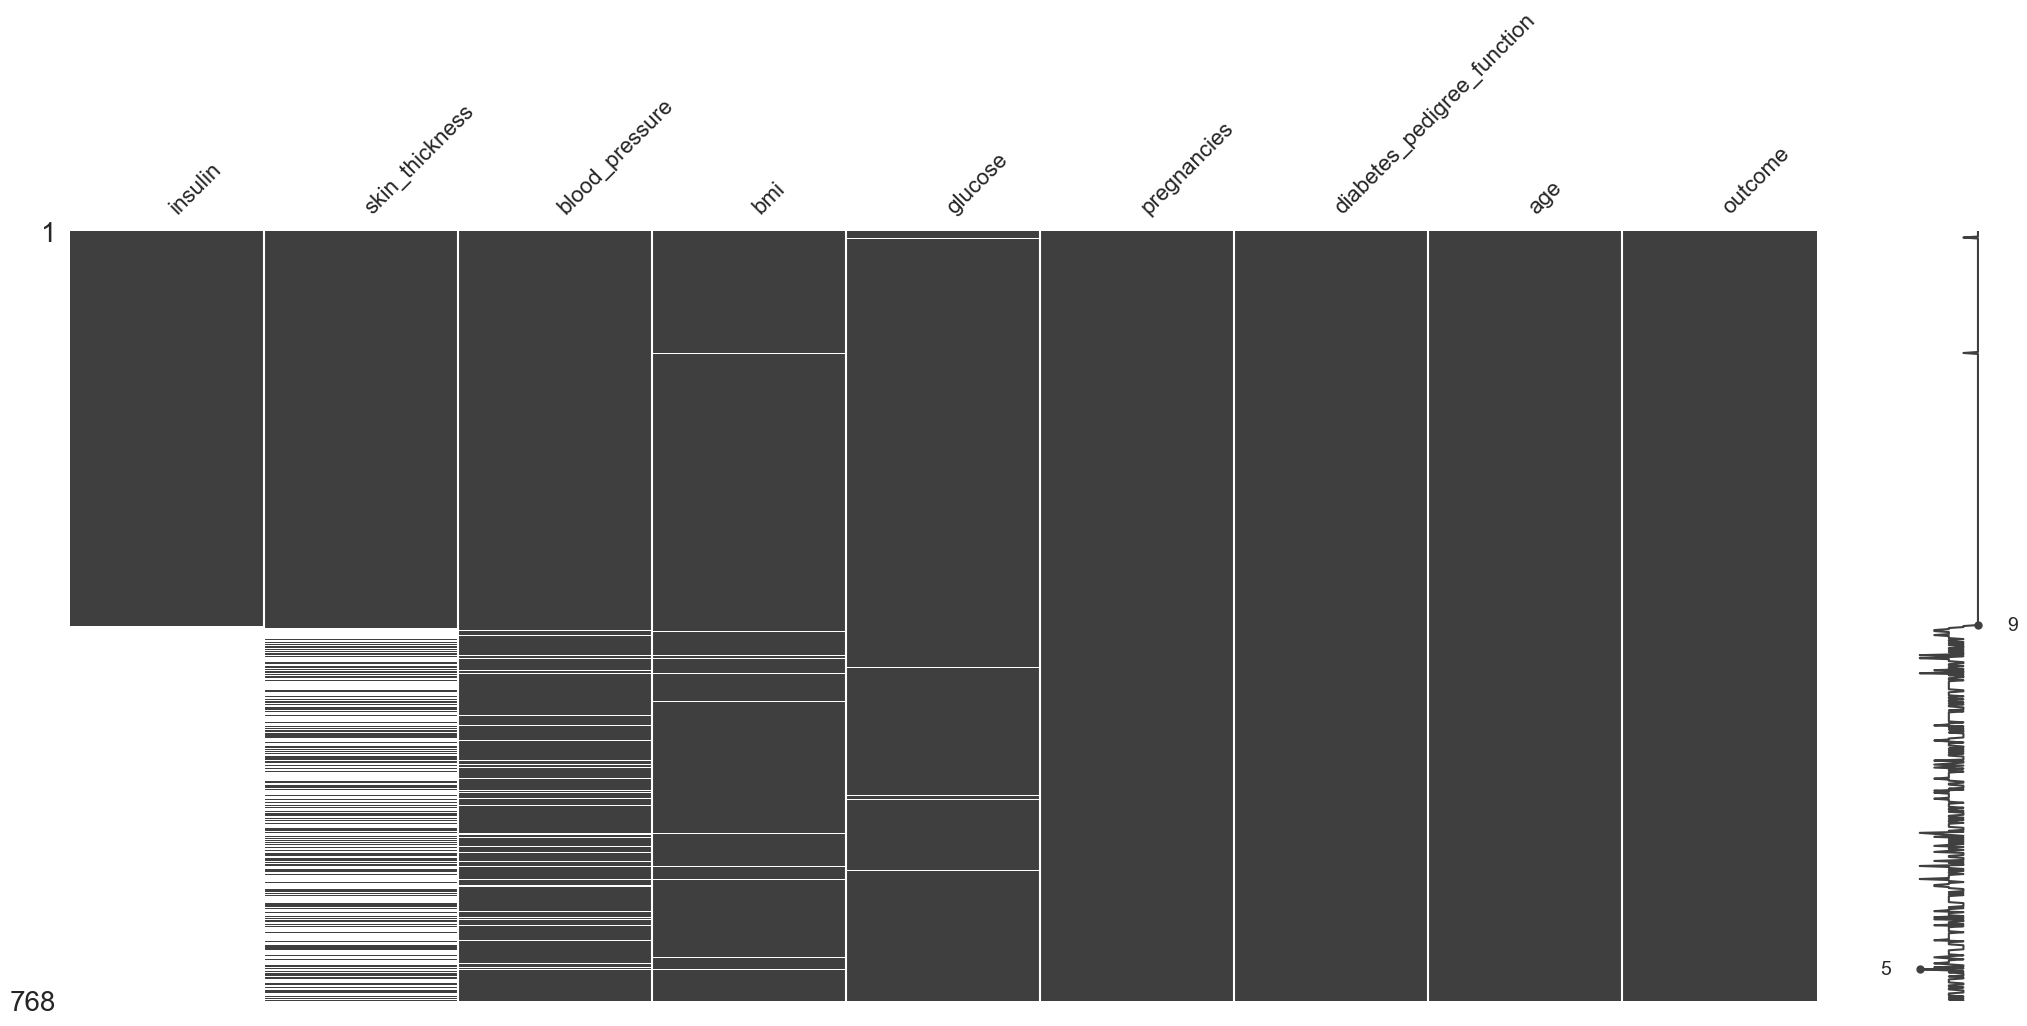

In [130]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values("insulin")
    .pipe(missingno.matrix)
)

En este fragmento de código, combinamos varios métodos para realizar un análisis detallado de los valores faltantes en `diabetes_df`, con un enfoque en la columna `insulin`:

- Iniciamos con `missing.sort_variables_by_missingness()` aplicado a `diabetes_df`. Este método ordena las columnas del DataFrame basándose en la cantidad de valores faltantes que contienen. Las columnas con más valores faltantes se mueven hacia el principio.

- Luego, utilizamos `sort_values("insulin")` para ordenar las filas del DataFrame según los valores en la columna `insulin`. Este paso permite visualizar cómo los valores faltantes en la columna `insulin` se distribuyen en el conjunto de datos.

- El DataFrame reorganizado se pasa a `missingno.matrix` a través de `pipe`. Este método crea una visualización gráfica donde las filas representan las observaciones (casos) y las columnas las variables, mostrando los valores faltantes como espacios en blanco en la matriz.

- Esta técnica proporciona una visión clara de la distribución y el patrón de los valores faltantes, especialmente en la columna `insulin`. La visualización ayuda a identificar si hay áreas específicas del conjunto de datos que tienen una concentración más alta de valores faltantes.

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

In [131]:
(
    riskfactors_df
    .isna()
    .replace({
        False: "Not missing",
        True: "Missing"
    })
    .add_suffix("_NA")
    .pipe(
        lambda shadow_matrix: pd.concat(
            [riskfactors_df, shadow_matrix],
            axis="columns"
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


Este fragmento de código ilustra cómo crear una representación visual de los valores faltantes en `riskfactors_df` y luego combinar esta representación con el DataFrame original:

- Primero, aplicamos `.isna()` a `riskfactors_df`. Este método retorna un DataFrame booleano donde `True` indica la presencia de un valor faltante y `False` indica un valor no faltante.

- Luego, usamos `.replace({...})` para transformar los valores booleanos: `False` se convierte en `"Not missing"` y `True` en `"Missing"`. Esto convierte el DataFrame booleano en un DataFrame de cadenas de texto, facilitando la interpretación visual de los datos faltantes.

- Con `.add_suffix("_NA")`, agregamos un sufijo a cada nombre de columna para indicar que estas columnas representan el estado de "faltante" o "no faltante" de los datos originales.

- Finalmente, utilizamos `.pipe(lambda shadow_matrix: pd.concat([riskfactors_df, shadow_matrix], axis="columns"))` para concatenar el DataFrame original `riskfactors_df` con la "shadow matrix" generada. `pd.concat` se usa para combinar ambos DataFrames lado a lado (`axis="columns"`), resultando en un DataFrame más grande que incluye tanto los datos originales como su correspondiente estado de faltante/no faltante.

### Utilizar función de utilería `bind_shadow_matrix()`

In [132]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing = True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


El método `bind_shadow_matrix` se utiliza en `riskfactors_df` para adjuntar una matriz sombra que refleja la presencia de valores faltantes en el DataFrame, con un enfoque específico en las columnas que tienen datos faltantes:

- `bind_shadow_matrix` es un método de una extensión personalizada de Pandas para el análisis de datos faltantes. Este método crea una nueva representación de los datos, mostrando dónde faltan los valores.

- `only_missing = True`: Este parámetro indica que la matriz sombra debe incluir únicamente las columnas que contienen al menos un valor faltante. Las columnas sin valores faltantes no se incluyen en la matriz sombra.

- Al aplicar `bind_shadow_matrix`, se genera una nueva versión de `riskfactors_df` donde cada columna original que tiene valores faltantes se duplica. En la columna duplicada, los valores faltantes se marcan de manera explícita, generalmente con un indicador como "Missing".

- Esta técnica es valiosa para análisis de datos donde es crucial identificar y entender la presencia y distribución de valores faltantes. Al unir la matriz sombra con el DataFrame original, se facilita la identificación visual de dónde y en qué medida faltan datos en el conjunto de datos.


### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

In [133]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .groupby(["weight_lbs_NA"])
    ["age"]
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


En este fragmento de código, combinamos varias técnicas de análisis de datos en `riskfactors_df` para explorar la relación entre los valores faltantes en la columna `weight_lbs` y las estadísticas descriptivas de la columna `age`:

- Primero, aplicamos `missing.bind_shadow_matrix(only_missing=True)` a `riskfactors_df`. Esto crea una nueva versión del DataFrame donde cada columna original que tiene valores faltantes se duplica con un sufijo "_NA". En estas columnas duplicadas, los valores faltantes se marcan explícitamente.

- Luego, utilizamos `groupby(["weight_lbs_NA"])` para agrupar los datos según el estado de valores faltantes en la columna `weight_lbs`. Esto nos permite separar los datos en dos grupos: uno donde `weight_lbs` está presente (`"Not missing"`) y otro donde falta (`"Missing"`).

- A continuación, seleccionamos la columna `age` y aplicamos el método `describe()`. Esto proporciona estadísticas descriptivas (como el conteo, la media, la desviación estándar, etc.) para la columna `age`, separadas por el estado de valores faltantes en `weight_lbs`.

- Finalmente, con `reset_index()`, convertimos el índice agrupado en una columna regular del DataFrame, facilitando su lectura y posibles análisis posteriores.

Este enfoque es útil para comprender cómo la presencia o ausencia de datos en una variable (`weight_lbs`) puede estar asociada con diferentes características estadísticas en otra variable (`age`). Este tipo de análisis es común en la exploración de datos y puede proporcionar insights valiosos, especialmente en el contexto de la preparación de datos para modelado estadístico o aprendizaje automático.

## Visualización de valores faltantes en una variable

<AxesSubplot:>

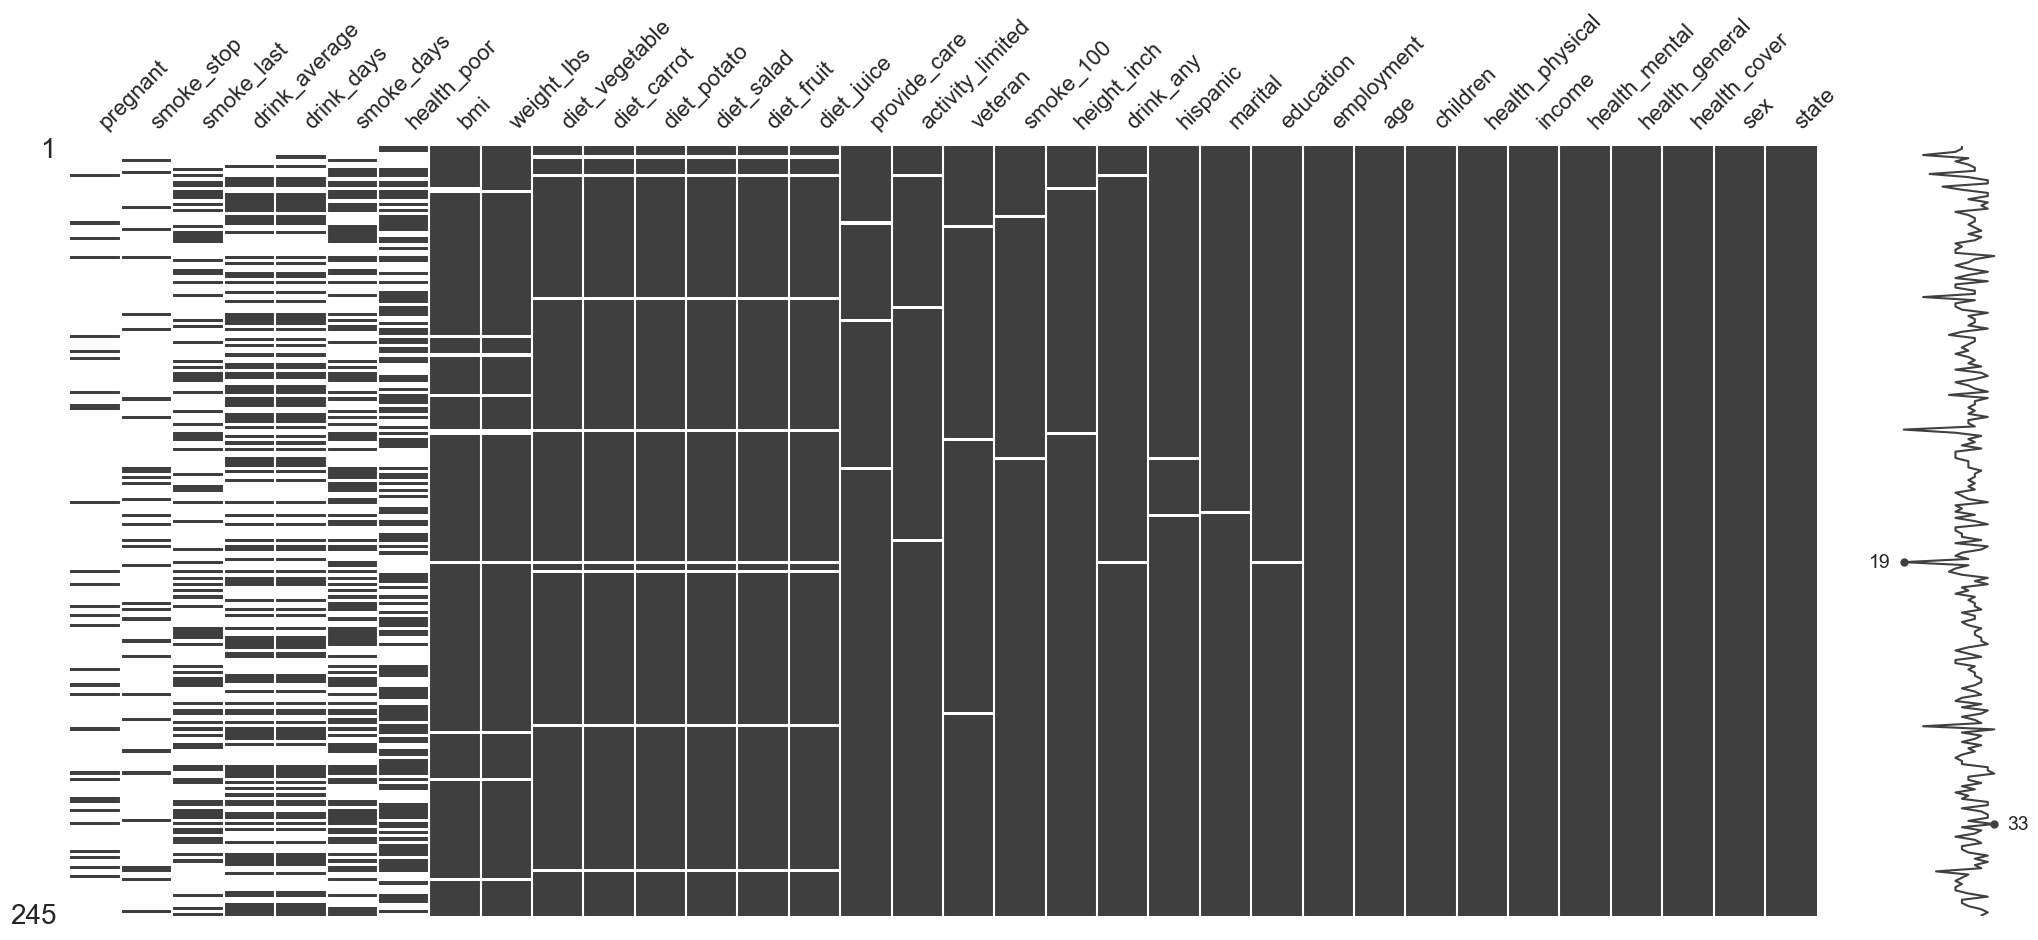

In [134]:
import missingno as msno



# Primero, crearemos una 'shadow matrix' solo para las columnas con valores faltantes
shadow_matrix = (
    riskfactors_df
    .isna()
    .replace({False: 0, True: 1})
)

# Luego, ordenamos las columnas por la cantidad de valores faltantes
sorted_columns = shadow_matrix.sum().sort_values(ascending=False).index
riskfactors_df_sorted = riskfactors_df[sorted_columns]

# Ahora, podemos usar missingno.matrix en el DataFrame reordenado
msno.matrix(riskfactors_df_sorted)



Este fragmento de código utiliza la biblioteca `missingno` para analizar y visualizar los valores faltantes en el DataFrame `riskfactors_df`:

- `import missingno as msno`: Importamos la biblioteca `missingno`, que es una herramienta especializada en la visualización de datos faltantes. La importamos con el alias `msno` para un acceso más cómodo.

- Creación de la 'Shadow Matrix':
  - `riskfactors_df.isna()`: Este método crea un DataFrame booleano a partir de `riskfactors_df` donde cada valor es `True` si el dato correspondiente es faltante (NaN) y `False` en caso contrario.
  - `.replace({False: 0, True: 1})`: Convertimos este DataFrame booleano en un formato numérico, reemplazando `False` por `0` y `True` por `1`. Esto facilita las operaciones numéricas posteriores, como sumar para contar los valores faltantes.

- Ordenamiento de las Columnas por Valores Faltantes:
  - `shadow_matrix.sum()`: Sumamos los valores en la 'shadow matrix'. Dado que los valores faltantes están representados por `1`, esta suma nos da la cantidad total de valores faltantes en cada columna.
  - `.sort_values(ascending=False)`: Ordenamos las columnas basándonos en la cantidad de valores faltantes, con las columnas que tienen más valores faltantes primero.
  - `.index`: Obtenemos los nombres de las columnas en este orden ordenado.

- Preparación para la Visualización:
  - `riskfactors_df[sorted_columns]`: Reorganizamos `riskfactors_df` para que las columnas sigan el orden que determinamos anteriormente, es decir, con las columnas que tienen más valores faltantes al principio.
  - `msno.matrix(riskfactors_df_sorted)`: Utilizamos `missingno.matrix` en el DataFrame reorganizado para visualizar los valores faltantes. En esta visualización, las líneas blancas indican la presencia de valores faltantes.


/Users/ivanozono/Proyects/missing_values_detection/venv/lib/python3.10/site-packages/seaborn/utils.py:136: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = method([], [], **kws)


<AxesSubplot:xlabel='weight_lbs_NA', ylabel='age'>

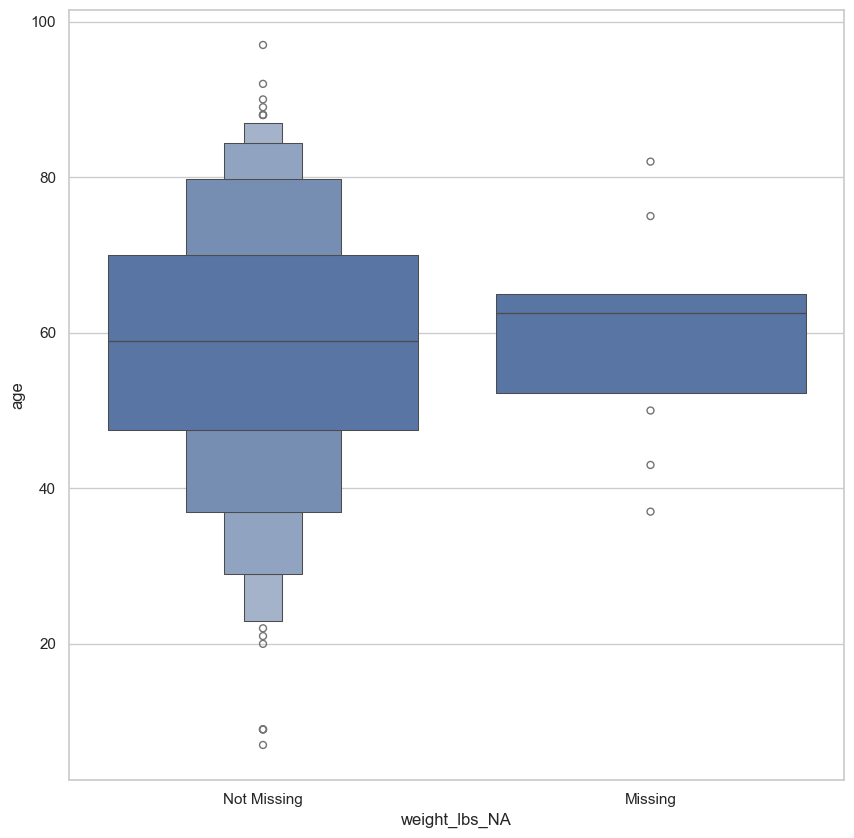

In [135]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.boxenplot(
                data=df,
                x="weight_lbs_NA",
                y="age",
            )
        )
    )
)


Este fragmento de código demuestra cómo podemos analizar la relación entre los valores faltantes en la columna `weight_lbs` y la distribución de la variable `age` en el DataFrame `riskfactors_df`, utilizando técnicas de pandas y seaborn:

- **Creación de una Matriz Sombra con `bind_shadow_matrix`**: 
  - Utilizamos el método `bind_shadow_matrix(only_missing=True)` para generar una matriz sombra en `riskfactors_df`. Este método crea una representación paralela de nuestro DataFrame, donde marcamos con indicadores si los valores están faltando en las columnas especificadas. 
  - `only_missing=True` significa que solo incluiremos en la matriz sombra aquellas columnas que efectivamente tienen valores faltantes.

- **Preparación para la Visualización con `pipe`**:
  - La función `pipe` se usa para encadenar operaciones. Aquí, pasamos nuestra matriz sombra a una función lambda para su visualización.
  - Dentro de la función lambda, utilizamos `sns.boxenplot`. Esta es una función de seaborn que crea un gráfico de caja mejorado, el cual es útil para visualizar distribuciones de datos y sus outliers.

- **Configuración del Gráfico `boxenplot`**:
  - En `sns.boxenplot`, `data=df` especifica que nuestro conjunto de datos es el DataFrame procesado.
  - `x="weight_lbs_NA"` indica que queremos las cajas distribuidas según la presencia o ausencia de datos en la columna `weight_lbs`.
  - `y="age"` define la variable que queremos explorar, en este caso, la edad.

Este enfoque nos permite visualizar cómo la distribución de la variable `age` varía entre los registros con datos faltantes y no faltantes en `weight_lbs`. Es una técnica valiosa para entender las diferencias en las distribuciones de una variable clave en relación con la presencia de datos faltantes en otra variable.

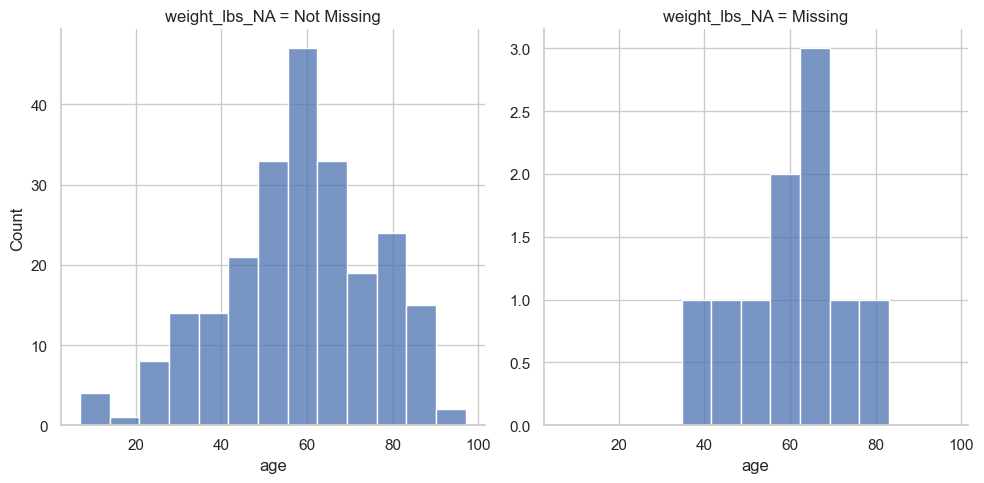

In [136]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                col="weight_lbs_NA",
                facet_kws={
                    "sharey": False
                }
            )
        )
    )
)


Este fragmento de código nos ayuda a entender cómo los valores faltantes en la columna `weight_lbs` del DataFrame `riskfactors_df` se relacionan con la distribución de la variable `age`, utilizando para ello una visualización en seaborn:

- **Paso 1: Crear una Matriz Sombra con `bind_shadow_matrix`**: 
  - Empezamos con el método `bind_shadow_matrix(only_missing=True)` en `riskfactors_df`. Este método crea una nueva versión del DataFrame donde marcamos con indicadores específicos las filas que tienen datos faltantes en las columnas seleccionadas.
  - Con `only_missing=True`, nos enfocamos solo en las columnas que realmente tienen datos faltantes.

- **Paso 2: Visualización con Seaborn mediante `pipe`**:
  - A través de `pipe`, pasamos el DataFrame resultante a una función lambda para su visualización.
  - Dentro de la función lambda, utilizamos `sns.displot` para crear un gráfico de distribución. `displot` es una función versátil para visualizar la distribución de una variable.

- **Configuración del Gráfico `displot`**:
  - `data=df` le dice a seaborn que use nuestro DataFrame procesado.
  - `x="age"` especifica que queremos ver la distribución de la variable `age`.
  - `col="weight_lbs_NA"` crea un panel separado para cada categoría en la columna `weight_lbs_NA`, permitiéndonos comparar las distribuciones de `age` entre los datos con y sin valores faltantes en `weight_lbs`.
  - `facet_kws={"sharey": False}` se usa para permitir que cada panel tenga su propia escala en el eje y, lo cual es útil para ver las distribuciones en detalle.

Este enfoque nos proporciona una visión clara de cómo varía la distribución de la edad en relación con la presencia o ausencia de datos en la columna `weight_lbs`. Es una manera eficaz de visualizar y comparar distribuciones en subgrupos de datos, lo cual es esencial para comprender las características y tendencias en conjuntos de datos complejos.

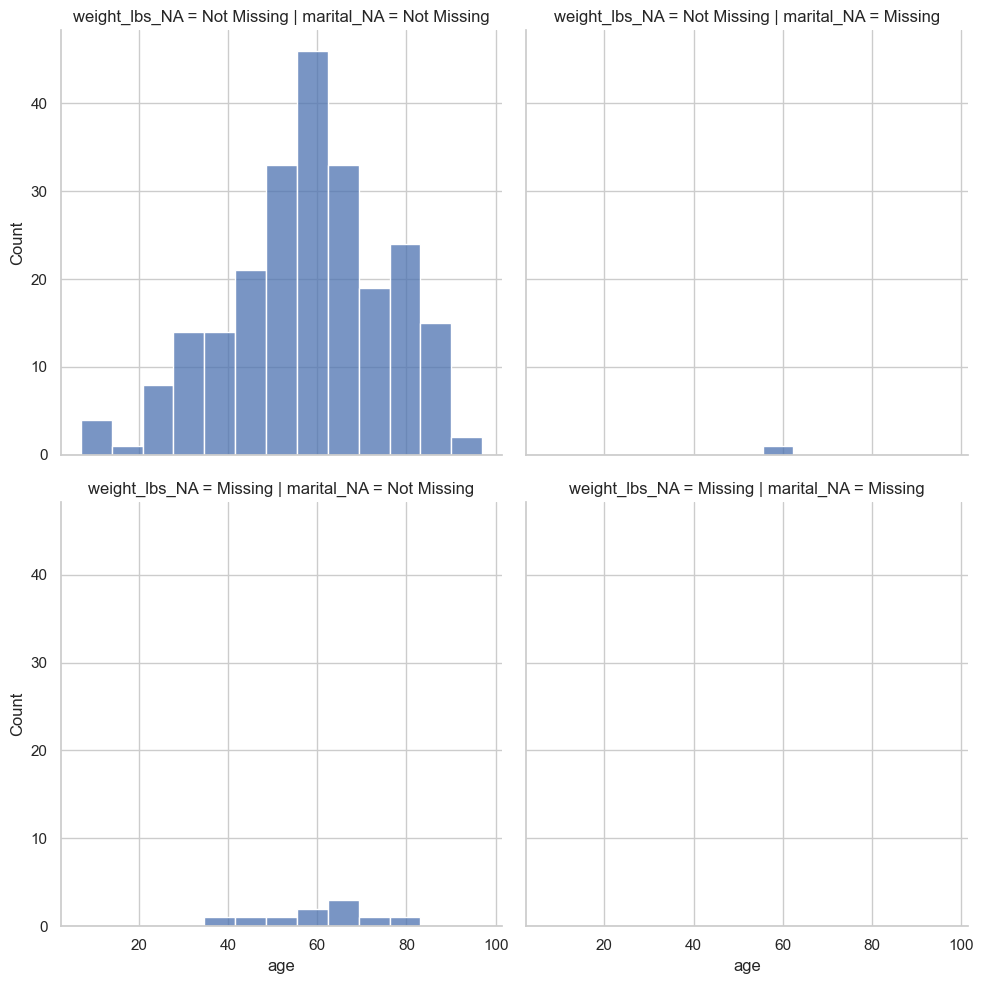

In [137]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="age",
                col="marital_NA",
                row="weight_lbs_NA"
            )
        )
    )
)

Este código proporciona un análisis detallado de la relación entre los valores faltantes en las columnas `marital` y `weight_lbs` del DataFrame `riskfactors_df` y la distribución de la variable `age`, utilizando para ello una visualización en seaborn:

- **Paso 1: Generar una Matriz Sombra con `bind_shadow_matrix`**:
  - Comenzamos con `bind_shadow_matrix(only_missing=True)` aplicado a `riskfactors_df`. Este método crea una versión paralela del DataFrame donde se indica la presencia de valores faltantes en las columnas seleccionadas.
  - Con `only_missing=True`, la matriz sombra incluirá solo aquellas columnas que tienen datos faltantes.

- **Paso 2: Visualización Avanzada con Seaborn usando `pipe`**:
  - Utilizamos `pipe` para encadenar la matriz sombra a una función lambda destinada a la visualización.
  - Dentro de la función lambda, `sns.displot` se utiliza para crear un gráfico de distribución que nos permite observar cómo se distribuye la variable `age`.

- **Configuración de la Visualización con `displot`**:
  - `data=df` especifica que seaborn debe usar el DataFrame procesado.
  - `x="age"` indica que queremos visualizar la distribución de la variable `age`.
  - `col="marital_NA"` y `row="weight_lbs_NA"` se usan para crear un grid de gráficos. Cada columna del grid representa una categoría en `marital_NA` y cada fila representa una categoría en `weight_lbs_NA`. Esto permite una comparación multifacética de las distribuciones de `age` en relación con los datos faltantes en estas dos variables.

Este enfoque multidimensional nos brinda una visión integral de cómo la presencia o ausencia de datos en las columnas `marital` y `weight_lbs` puede influir en la distribución de la variable `age`. 

## Visualización de valores faltantes en dos variables

In [138]:
def column_fill_with_dummies(
    column: pd.Series,
    proportion_below: float=0.10,
    jitter: float=0.075,
    seed: int=42
) -> pd.Series:

    column = column.copy(deep=True)

    # Extract values metadata.
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    # Shift data
    column_shift = column.min() - column.min() * proportion_below

    # Create the "jitter" (noise) to be added around the points.
    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data.
    column[missing_mask] = column_shift + column_jitter

    return column

La función `column_fill_with_dummies` está diseñada para imputar valores en columnas de un DataFrame de Pandas que tienen datos faltantes, utilizando un método basado en "jitter" (ruido aleatorio):

- **Definición de la Función**: 
  - La función toma una serie de Pandas (`column`) y tres parámetros opcionales: `proportion_below`, `jitter`, y `seed`.
  - `proportion_below` es la proporción por la cual los valores generados estarán por debajo del mínimo de la columna. 
  - `jitter` determina la cantidad de ruido aleatorio que se añade.
  - `seed` se utiliza para asegurar la reproducibilidad de los resultados.

- **Preparación de la Columna**:
  - Se crea una copia de la columna para evitar modificar los datos originales.
  - Se calcula `missing_mask`, una máscara booleana que identifica los valores faltantes en la columna.

- **Cálculo del Rango y Desplazamiento de la Columna**:
  - Se determina el rango de la columna (diferencia entre el valor máximo y mínimo).
  - `column_shift` es calculado desplazando el valor mínimo de la columna hacia abajo por un factor determinado por `proportion_below`.

- **Creación del Jitter (Ruido Aleatorio)**:
  - Se establece una semilla para la generación de números aleatorios para asegurar resultados consistentes.
  - Se genera una serie de valores aleatorios (`column_jitter`) que se utilizarán para crear los valores de imputación.

- **Imputación de Valores Faltantes**:
  - Se suman `column_shift` y `column_jitter` para obtener los valores de imputación.
  - Estos valores se asignan a los lugares donde originalmente había datos faltantes en la columna.

- **Retorno de la Columna Modificada**:
  - La función retorna la columna con los valores faltantes ahora imputados con los nuevos valores generados.

Esta función es útil para imputar datos faltantes de manera que se mantenga una cierta coherencia con la distribución original de la columna, evitando introducir sesgos significativos. El uso de 'jitter' añade variabilidad a los valores imputados, lo que puede ser beneficioso en ciertos análisis estadísticos o modelos de aprendizaje automático.

<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

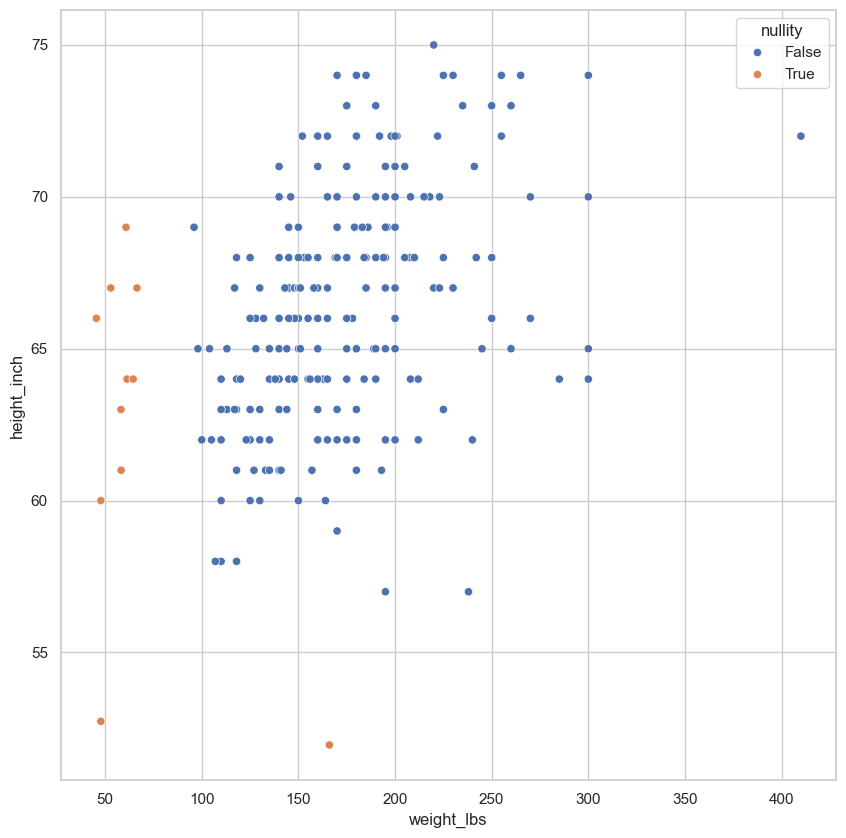

In [139]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_dtypes(
        exclude="category"
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="nullity"
            )
        )
    )
)

Este fragmento de código utiliza Pandas y Seaborn para visualizar la relación entre las columnas `weight_lbs` y `height_inch` en `riskfactors_df`, considerando los datos faltantes y aplicando una técnica de imputación:

- **Configuración del Espacio de la Gráfica**:
  - `plt.figure(figsize=(10, 10))`: Establecemos el tamaño de la gráfica que vamos a crear, con un tamaño de 10x10 pulgadas, proporcionando suficiente espacio para una visualización detallada.

- **Selección y Preparación de los Datos**:
  - `select_dtypes(exclude="category")`: Seleccionamos del DataFrame `riskfactors_df` solo aquellas columnas que no son de tipo categórico.
  - `pipe(lambda df: df[df.columns[df.isna().any()]])`: Filtramos las columnas para incluir solo aquellas que tienen al menos un valor faltante.

- **Creación de una Matriz Sombra y Aplicación de la Imputación**:
  - `bind_shadow_matrix(true_string=True, false_string=False)`: Creamos una matriz sombra para marcar los valores faltantes, donde `True` representa un dato faltante y `False` un dato presente.
  - `apply(lambda column: ...)`: Aplicamos una función a cada columna. Si el nombre de la columna contiene "_NA", se mantiene como está. Si no, aplicamos la función `column_fill_with_dummies` para imputar valores faltantes.

- **Determinación de la Nulidad y Visualización**:
  - `assign(nullity=lambda df: df.weight_lbs_NA | df.height_inch_NA)`: Creamos una nueva columna `nullity` que indica si hay valores faltantes en `weight_lbs` o `height_inch`.
  - `pipe(lambda df: sns.scatterplot(...))`: Utilizamos `sns.scatterplot` para crear un gráfico de dispersión de `weight_lbs` frente a `height_inch`, coloreando los puntos según si hay valores faltantes (`nullity`).

Este enfoque nos permite visualizar cómo se distribuyen los valores de `weight_lbs` y `height_inch` en relación con la presencia de valores faltantes, proporcionando una comprensión más clara de la estructura de los datos. Es una forma efectiva de explorar visualmente las relaciones entre variables numéricas y la incidencia de datos faltantes.

## Correlación de nulidad

/Users/ivanozono/Proyects/missing_values_detection/venv/lib/python3.10/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/Users/ivanozono/Proyects/missing_values_detection/venv/lib/python3.10/site-packages/seaborn/matrix.py:316: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


<AxesSubplot:>

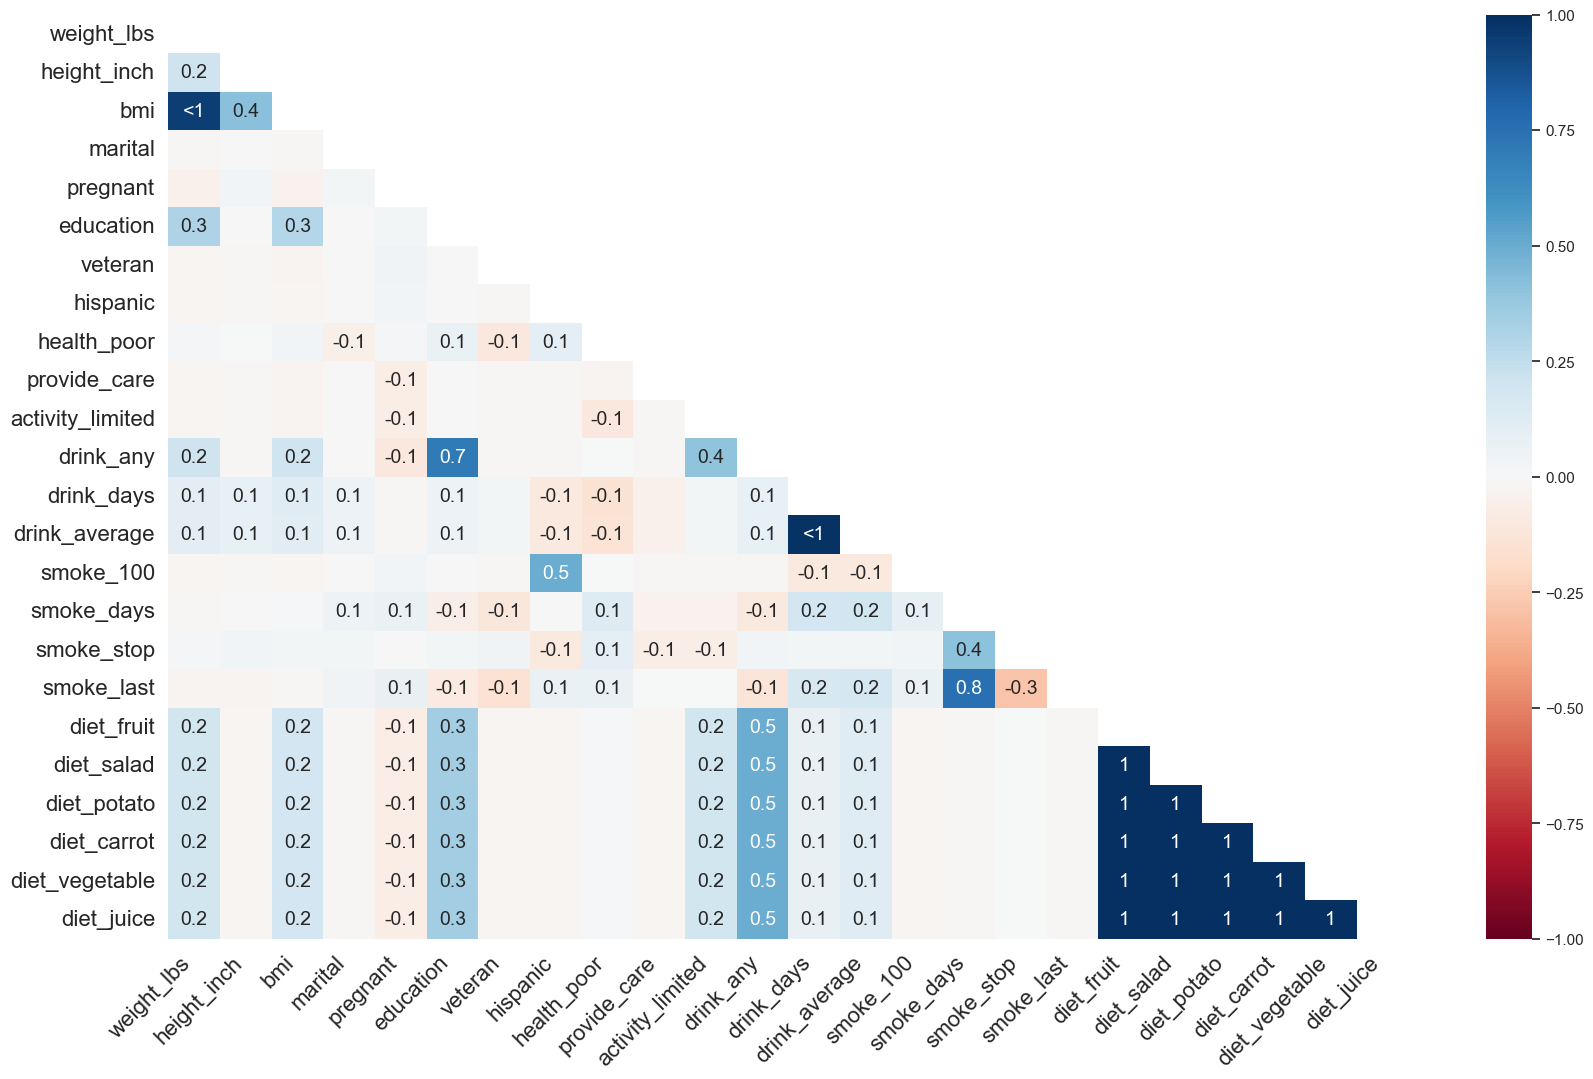

In [140]:
missingno.heatmap(
    df=riskfactors_df
)

El código utiliza la función `heatmap` de la biblioteca `missingno` para visualizar las correlaciones entre los valores faltantes en diferentes columnas del DataFrame `riskfactors_df`:

- **¿Qué es `missingno.heatmap`?**:
  - La función `heatmap` de la biblioteca `missingno` proporciona una herramienta de visualización que muestra la correlación (o la falta de ella) entre la presencia de valores faltantes en diferentes columnas de un DataFrame.
  - Esta correlación se mide en una escala de -1 a 1, donde 1 indica una correlación positiva perfecta (cuando un valor falta en una columna, también tiende a faltar en otra), -1 indica una correlación negativa perfecta, y 0 indica que no hay correlación.

- **Aplicación a `riskfactors_df`**:
  - `df=riskfactors_df`: Especificamos que queremos aplicar la función `heatmap` al DataFrame `riskfactors_df`.
  - Al ejecutar este comando, se generará un mapa de calor que representa gráficamente las correlaciones entre los valores faltantes en todas las columnas de `riskfactors_df`.

- **Interpretación del Mapa de Calor**:
  - En el mapa de calor resultante, cada celda muestra el grado de correlación entre los valores faltantes de dos columnas. Por ejemplo, una celda que intersecta la columna A con la columna B mostrará cuán frecuentemente los valores faltantes en A se corresponden con valores faltantes en B.
  - Las celdas coloreadas más intensamente (ya sea en tonos rojos o azules) indican una mayor correlación, mientras que las celdas con colores más suaves indican una correlación más baja.

Esta visualización es particularmente útil para identificar patrones en los datos faltantes, lo cual puede ser crucial para decisiones sobre la limpieza de datos, la imputación de valores faltantes o el análisis de la calidad de los datos. Entender dónde y cómo los datos faltan puede proporcionar insights valiosos sobre la naturaleza de los datos y posibles problemas subyacentes en el proceso de recopilación de datos.

<AxesSubplot:>

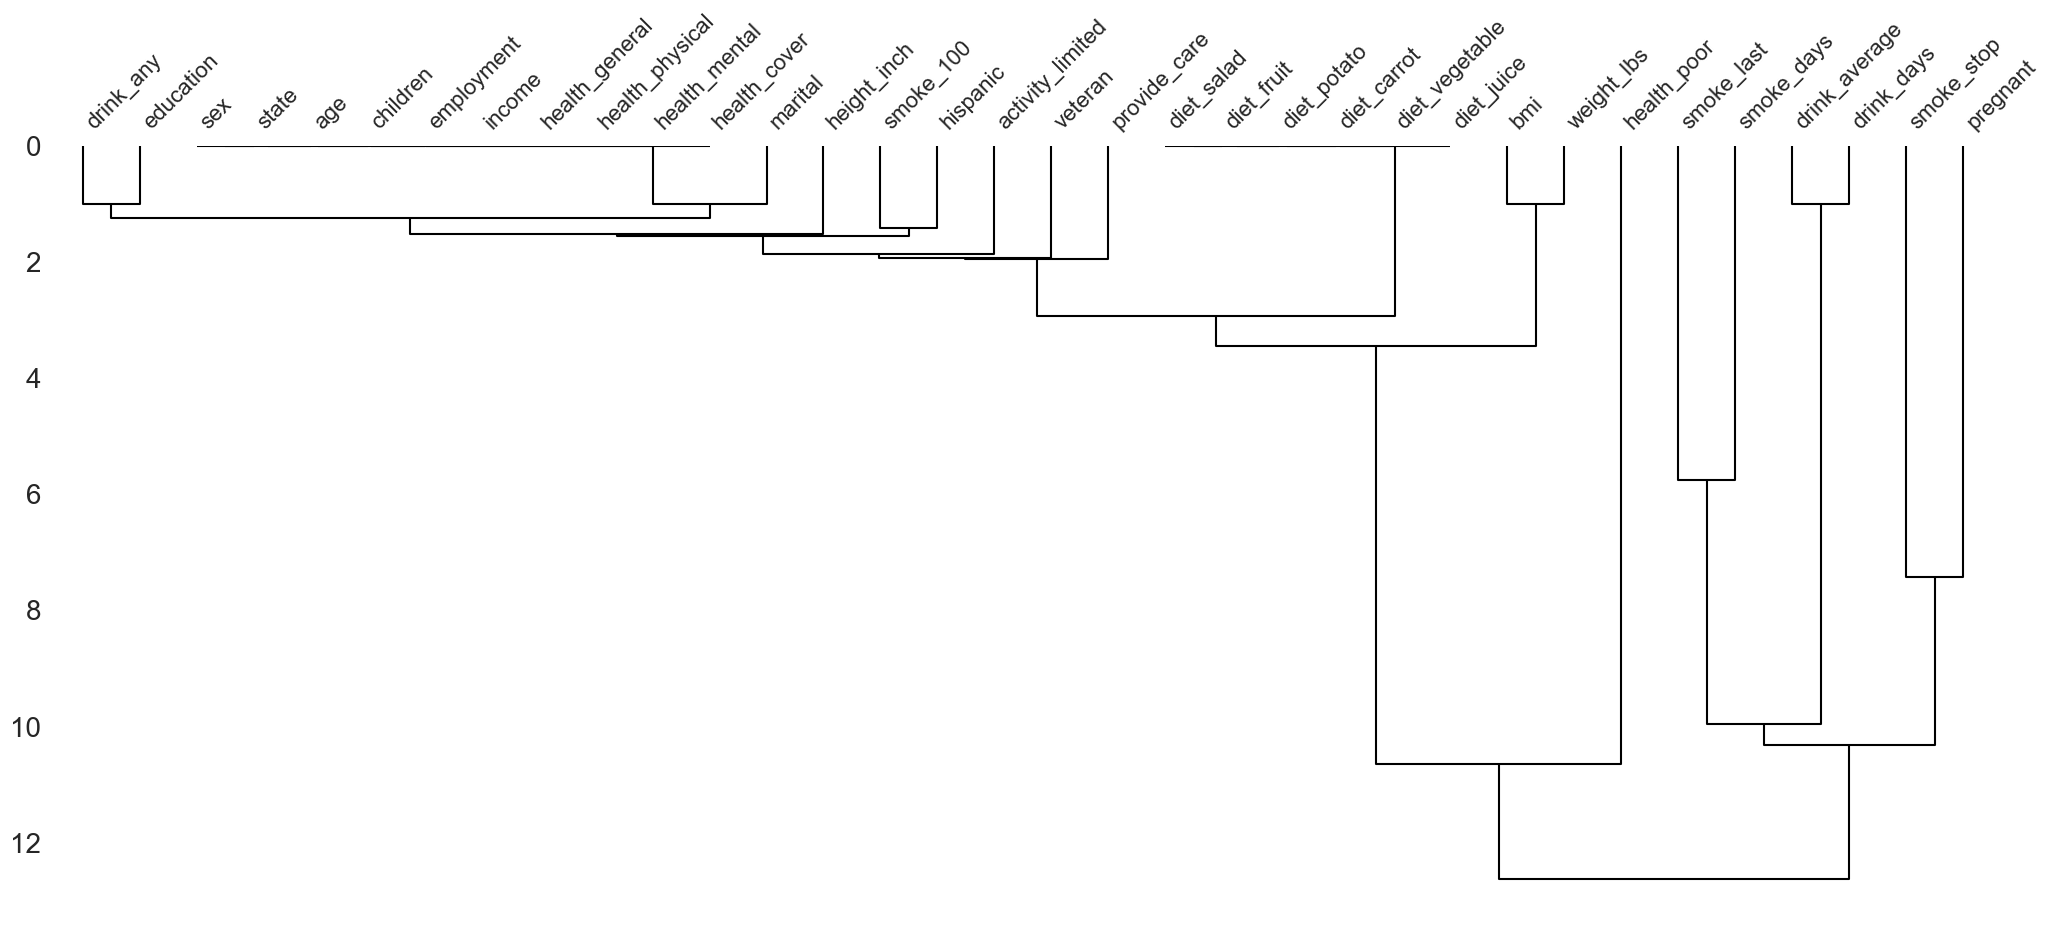

In [141]:
missingno.dendrogram(
    df=riskfactors_df
)

El código utiliza la función `dendrogram` de la biblioteca `missingno` para crear una visualización de tipo dendrograma, que muestra cómo se agrupan las columnas del DataFrame `riskfactors_df` en función de la similitud en sus patrones de datos faltantes:

- **¿Qué es `missingno.dendrogram`?**:
  - La función `dendrogram` de `missingno` genera un dendrograma, que es un tipo de diagrama de árbol utilizado para mostrar las relaciones de agrupamiento entre variables o conjuntos de datos.
  - En el contexto de datos faltantes, el dendrograma nos ayuda a visualizar cómo las diferentes columnas de `riskfactors_df` se relacionan entre sí en términos de sus patrones de datos faltantes.

- **Aplicación a `riskfactors_df`**:
  - `df=riskfactors_df`: Indicamos que queremos aplicar la función `dendrogram` al DataFrame `riskfactors_df`.
  - Al ejecutar este comando, se creará un dendrograma que agrupa las columnas basándose en la similitud de sus patrones de valores faltantes.

- **Interpretación del Dendrograma**:
  - En el dendrograma resultante, cada rama del árbol representa una columna del DataFrame. Las columnas que se agrupan más cerca unas de otras tienen patrones de valores faltantes más similares.
  - La estructura del árbol nos ayuda a identificar qué columnas tienden a tener valores faltantes bajo condiciones similares, lo cual puede ser indicativo de relaciones subyacentes entre las variables.

Esta visualización es útil para explorar las relaciones entre los patrones de datos faltantes en diferentes columnas del conjunto de datos.  Un dendrograma proporciona una representación visual intuitiva de estas relaciones, facilitando el análisis de la estructura de los datos y posibles correlaciones entre los patrones de datos faltantes.

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

In [142]:
riskfactors_df.shape

(245, 34)

- **Uso de `.shape`**:
  - `.shape` es un atributo de los DataFrames en Pandas que proporciona información rápida sobre el tamaño del DataFrame.
  - Al llamar a `riskfactors_df.shape`, obtenemos dos números: el primero representa la cantidad de filas (observaciones) y el segundo la cantidad de columnas (variables) en `riskfactors_df`.

- **Interpretación del Resultado**:
  - Si `riskfactors_df.shape` devuelve, por ejemplo, `(100, 5)`, esto significa que el DataFrame tiene 100 filas y 5 columnas.
  - Esta información es esencial para entender la escala de los datos con los que estás trabajando, y es un paso inicial común en el análisis de datos para obtener una visión general del conjunto de datos.


### _Pairwise deletion_ (eliminación por pares)

In [143]:
(
    riskfactors_df
    .weight_lbs
    .mean()
)

174.26808510638298

- **Selección de la Columna**:
  - `.weight_lbs`: Esta parte del código selecciona la columna `weight_lbs` del DataFrame `riskfactors_df`. En Pandas, puedes seleccionar una columna específica de un DataFrame utilizando el nombre de la columna precedido por un punto.

- **Cálculo de la Media**:
  - `.mean()`: Este método calcula el promedio de los valores numéricos en la columna seleccionada. En este caso, calcula el promedio de todos los valores en la columna `weight_lbs`.

- **Resultado**:
  - El resultado de este código es un solo número que representa la media de los pesos en `weight_lbs`. Este valor es útil para obtener una comprensión general de la distribución del peso en el conjunto de datos.

- **Consideraciones Adicionales**:
  - Si hay valores faltantes (`NaN`) en la columna `weight_lbs`, Pandas los ignorará automáticamente al calcular la media. Esto significa que solo se consideran los valores no faltantes en el cálculo.


In [144]:
riskfactors_df.weight_lbs.size, riskfactors_df.weight_lbs.count()

(245, 235)

1. **`riskfactors_df.weight_lbs.size`**:
   - `.size`: Este atributo devuelve el número total de elementos en la columna `weight_lbs`. Esto incluye tanto los valores válidos como los valores faltantes (`NaN`).
   - Resultado: Si `size` devuelve un número, digamos 100, esto significa que hay 100 elementos en total en la columna `weight_lbs`, contando tanto los valores existentes como los faltantes.

2. **`riskfactors_df.weight_lbs.count()`**:
   - `.count()`: Este método cuenta el número de valores no faltantes en la columna `weight_lbs`. A diferencia de `.size`, `.count()` ignora los valores `NaN`.
   - Resultado: Si `count` devuelve un número menor que `size`, por ejemplo, 95, esto indica que hay 95 valores no faltantes en la columna `weight_lbs` y la diferencia hasta el número devuelto por `size` (en este caso, 5) representa la cantidad de valores faltantes.

In [145]:
riskfactors_df.weight_lbs.mean(skipna=False)

nan

- **`riskfactors_df.weight_lbs.mean(skipna=False)`**:
   - `mean()`: Este método calcula el promedio de los valores en la columna `weight_lbs`.
   - `skipna=False`: Este parámetro es crucial. Normalmente, `mean()` ignora automáticamente los valores NaN (faltantes) al calcular el promedio. Sin embargo, al establecer `skipna=False`, le indicamos al método que no ignore los NaN. Esto significa que si hay valores NaN en la columna `weight_lbs`, el resultado del cálculo será NaN, ya que matemáticamente no se puede calcular un promedio que incluya valores indefinidos.

- **Importancia de `skipna=False`**:
   - Utilizar `skipna=False` puede ser útil si deseas asegurarte de que la presencia de cualquier valor faltante afecte el resultado del cálculo del promedio. Es decir, si la columna tiene al menos un NaN, el promedio de toda la columna será NaN.
   - Esto es especialmente relevante en análisis donde los valores faltantes tienen un significado importante y no deben ignorarse o imputarse sin consideración.

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

In [146]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs"],
        how="any"
    )
    .shape
)

(235, 34)

- **`riskfactors_df.dropna(subset=["weight_lbs"], how="any")`**:
   - `dropna()`: Este método se utiliza para eliminar filas del DataFrame que contienen valores faltantes (`NaN`).
   - `subset=["weight_lbs"]`: Especifica que sólo se deben considerar los valores faltantes en la columna `weight_lbs` para la operación de eliminación. Es decir, solo se eliminarán las filas que tengan un valor faltante en `weight_lbs`.
   - `how="any"`: Indica que si hay cualquier valor faltante (`NaN`) en las columnas especificadas en `subset`, entonces esa fila debe ser eliminada. Es la opción predeterminada para `how`, por lo que también podría omitirse.

- **`.shape`**:
   - Después de eliminar las filas con valores faltantes en `weight_lbs`, utilizamos `.shape` para obtener las dimensiones del DataFrame resultante.
   - Esto devolverá una tupla que representa el número de filas y columnas en el DataFrame después de la eliminación. Por ejemplo, `(150, 10)` significaría que el DataFrame resultante tiene 150 filas y 10 columnas.


#### Con base en 2 o más columnas

In [147]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="any"
    )
    .shape
)

(234, 34)


- **Uso de `dropna()` con Parámetros Específicos**:
   - `dropna(subset=["weight_lbs", "height_inch"], how="any")`: Este método se usa para eliminar filas en `riskfactors_df` que contienen valores faltantes en cualquiera de las columnas especificadas en `subset`. 
      - `subset=["weight_lbs", "height_inch"]` le dice a Pandas que solo considere las columnas `weight_lbs` y `height_inch` para buscar valores faltantes.
      - `how="any"` significa que si una fila tiene un valor faltante en al menos una de estas dos columnas, esa fila será eliminada. 

- **Determinación de las Dimensiones del DataFrame Modificado**:
   - `.shape`: Después de realizar la operación de eliminación de filas, `.shape` se utiliza para obtener las dimensiones del DataFrame resultante.
   - El resultado será una tupla que representa el número de filas y columnas después de eliminar las filas con datos faltantes en `weight_lbs` o `height_inch`. Por ejemplo, si el resultado es `(120, 15)`, indica que el DataFrame ahora tiene 120 filas y 15 columnas.


In [148]:
(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],
        how="all"
    )
    .shape
)

(244, 34)

- **Función `.dropna()` con Parámetros Específicos**:
   - `dropna(subset=["weight_lbs", "height_inch"], how="all")`: Este método se utiliza para eliminar filas del DataFrame `riskfactors_df`.
      - `subset=["weight_lbs", "height_inch"]`: Indica que la eliminación de filas debe considerar solo las columnas `weight_lbs` y `height_inch`.
      - `how="all"`: Significa que una fila será eliminada si todos los valores en las columnas especificadas en `subset` son faltantes. A diferencia de `how="any"`, que elimina una fila si al menos uno de los valores en las columnas especificadas es faltante, `how="all"` solo elimina la fila si todos los valores en `weight_lbs` y `height_inch` están faltantes.

- **Obtención de las Dimensiones del DataFrame Resultante**:
   - `.shape`: Tras la eliminación de filas, este atributo devuelve una tupla que representa el número de filas y columnas en el DataFrame modificado.
   - Por ejemplo, si el resultado es `(130, 10)`, esto significa que después de eliminar las filas donde tanto `weight_lbs` como `height_inch` tenían valores faltantes, el DataFrame resultante tiene 130 filas y 10 columnas.


### Representación gráfica tras la eliminación de los valores faltantes

<AxesSubplot:>

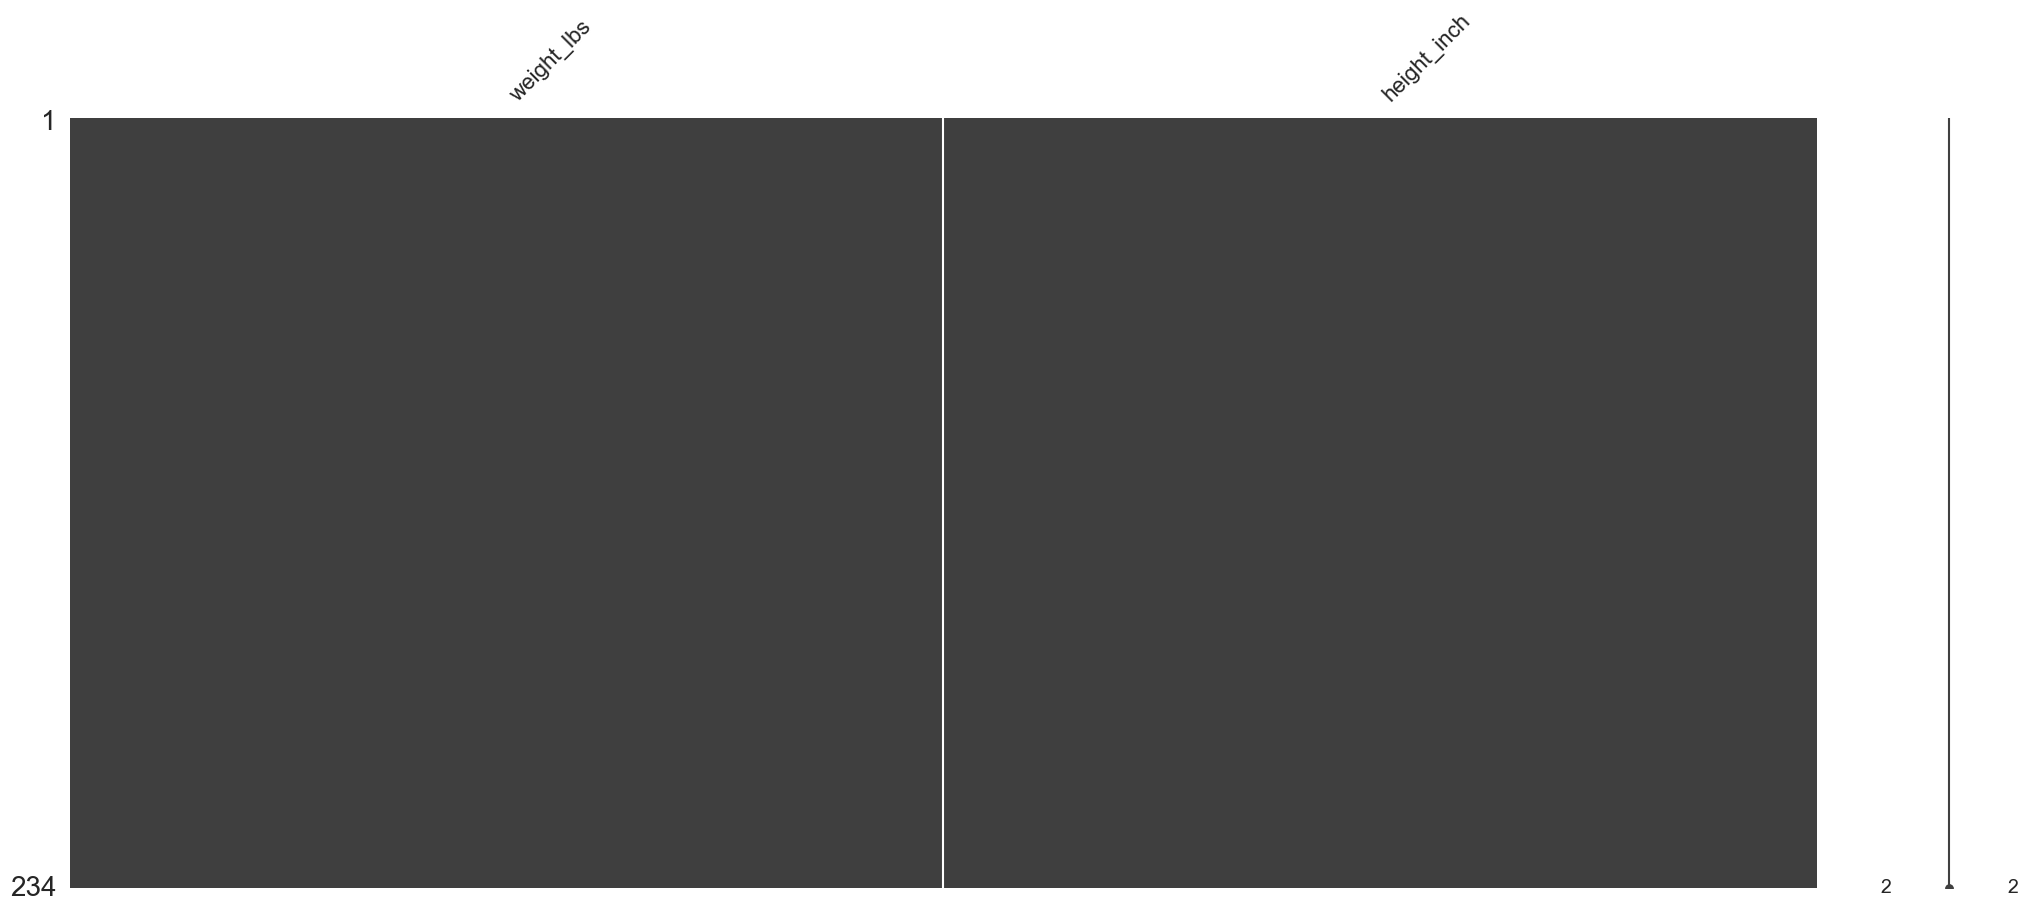

In [158]:

(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],  # Eliminar filas donde falta el peso o la altura
        how="any"
    )
    .filter(["weight_lbs", "height_inch"])  # Seleccionando columnas específicas para análisis
    .pipe(
        lambda df: missingno.matrix(df)  # Usando missingno para visualizar los datos faltantes restantes
    )
)



 **Eliminar Filas con Datos Faltantes**:
   - `.dropna(subset=["weight_lbs", "height_inch"], how="any")`: Este método elimina las filas del DataFrame `riskfactors_df` donde falta al menos un valor en las columnas `weight_lbs` o `height_inch`. La opción `how="any"` significa que si cualquiera de las columnas en `subset` tiene un valor faltante, entonces esa fila se elimina.

**Seleccionar Columnas Específicas**:
   - `.filter(["weight_lbs", "height_inch"])`: Después de eliminar filas, este método filtra el DataFrame para incluir solo las columnas `weight_lbs` y `height_inch`. Esto permite centrarse en estas columnas para el análisis posterior.

**Visualización de Datos Faltantes con `missingno.matrix`**:
   - `.pipe(lambda df: missingno.matrix(df))`: Usamos el método `pipe` para aplicar la función `missingno.matrix` al DataFrame filtrado. `missingno.matrix` crea una visualización gráfica que muestra dónde faltan datos en las columnas seleccionadas.



<AxesSubplot:>

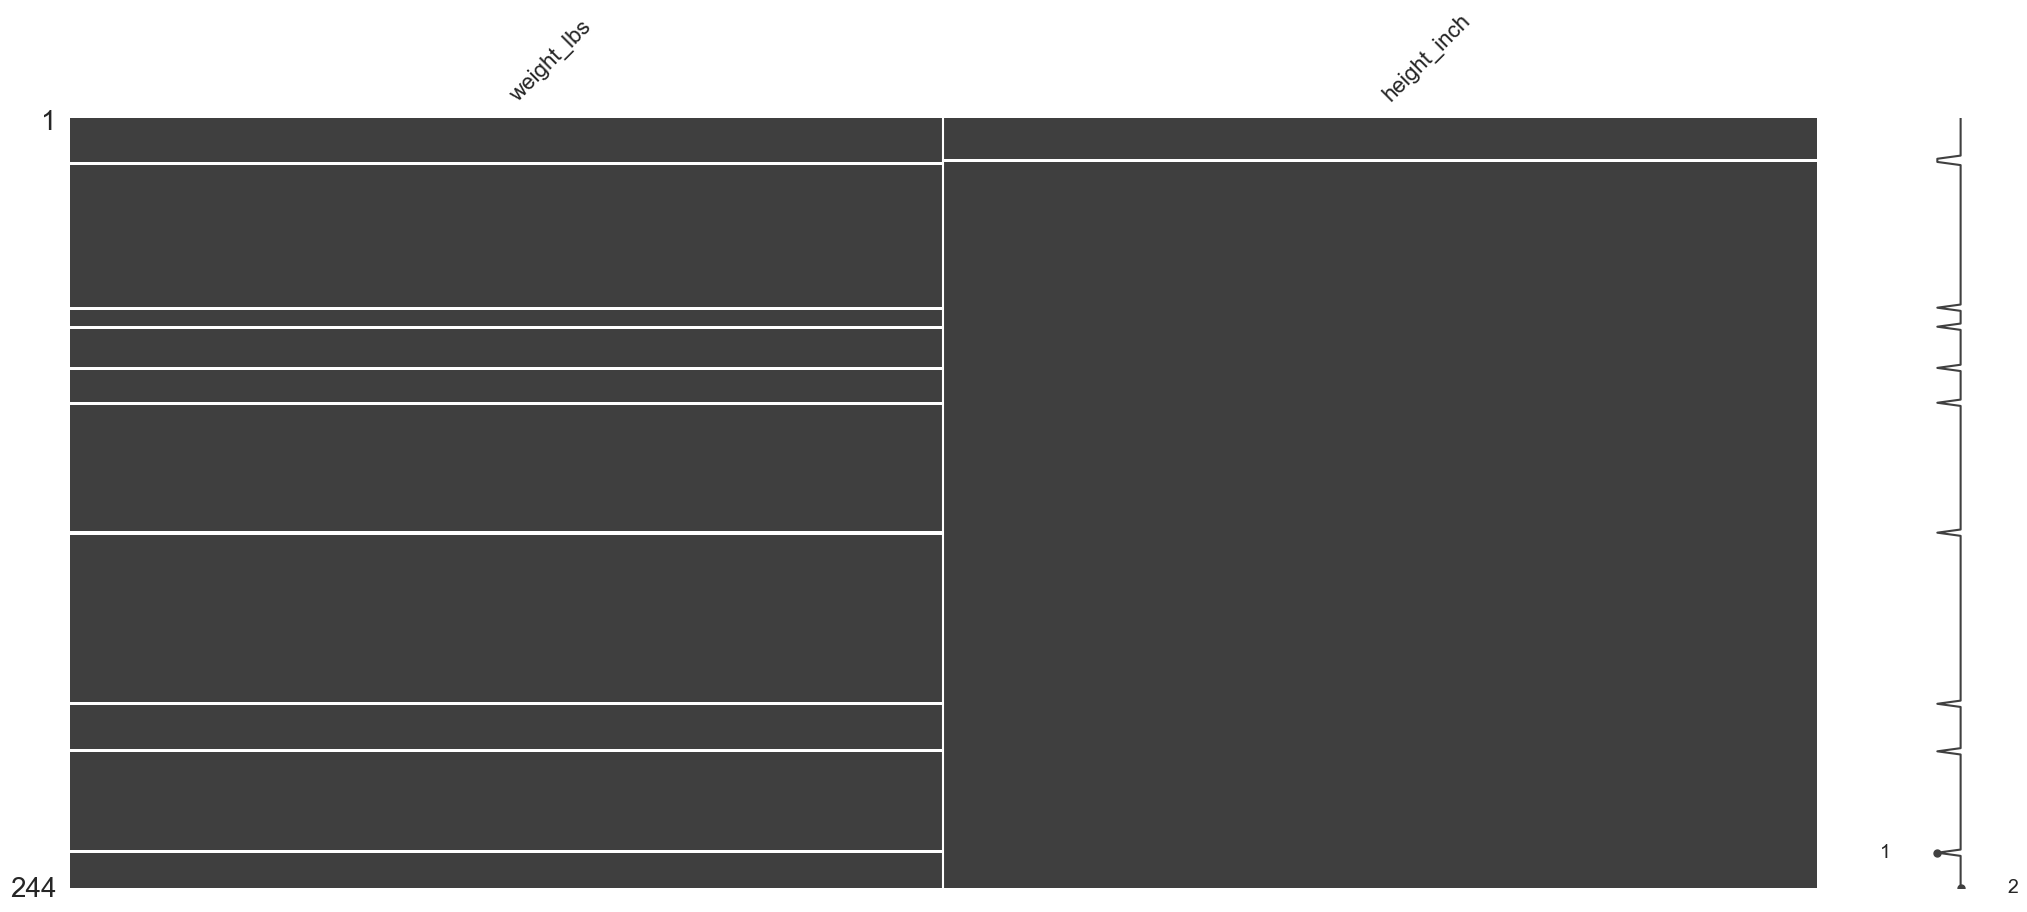

In [159]:

(
    riskfactors_df
    .dropna(
        subset=["weight_lbs", "height_inch"],  # Eliminar filas donde ambos, peso y altura, estén faltantes
        how="all"
    )
    .filter(["weight_lbs", "height_inch"])  # Seleccionando columnas específicas para análisis
    .pipe(
        lambda df: missingno.matrix(df)  # Usando missingno para visualizar los datos faltantes restantes
    )
)




   **Eliminar Filas con Datos Faltantes en Ambas Columnas**:
   - `.dropna(subset=["weight_lbs", "height_inch"], how="all")`: Este método elimina las filas donde tanto `weight_lbs` como `height_inch` son faltantes. `how="all"` asegura que solo se eliminen las filas si todos los campos especificados en `subset` están faltantes.

  **Seleccionar Columnas Específicas**:
   - `.filter(["weight_lbs", "height_inch"])`: Después de la eliminación, este paso selecciona solo las columnas `weight_lbs` y `height_inch` para el análisis posterior.

   **Visualización de los Datos Faltantes**:
   - `.pipe(lambda df: missingno.matrix(df))`: Utiliza `pipe` para aplicar la función `missingno.matrix` al DataFrame filtrado. Esta función crea una visualización gráfica de los datos faltantes en las columnas seleccionadas.


## Imputación básica de valores faltantes

### Imputación con base en el contexto

In [151]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350
1,NaN,afternoon,310
2,zelda,morning,320
3,NaN,afternoon,350
4,shadowsong,morning,310
5,NaN,afternoon,320



   **Creación del DataFrame `implicit_to_explicit_df`**:
   - Se utiliza `pd.DataFrame` para crear un nuevo DataFrame a partir de un diccionario de datos.
   - El diccionario contiene tres claves: `name`, `time` y `value`, cada una de las cuales corresponde a una columna en el DataFrame.

   **Datos del DataFrame**:
   - `name`: Esta columna contiene nombres (strings) y valores `np.nan` (que representan datos faltantes en Pandas). Los nombres se repiten, alternando con `np.nan`.
   - `time`: Contiene strings que representan diferentes momentos del día (por ejemplo, "morning", "afternoon"). Se repiten en un patrón fijo.
   - `value`: Contiene valores numéricos (enteros) en secuencia.

   **Estructura del DataFrame Resultante**:
   - El DataFrame resultante tendrá 6 filas y 3 columnas, correspondientes a las claves del diccionario y la longitud de las listas proporcionadas.
   - Las columnas serán `name`, `time` y `value`.


In [152]:
implicit_to_explicit_df.ffill()

,name,time,value
0,lynn,morning,350
1,lynn,afternoon,310
2,zelda,morning,320
3,zelda,afternoon,350
4,shadowsong,morning,310
5,shadowsong,afternoon,320


**Uso de `.ffill()` en `implicit_to_explicit_df`**:
   - La función `.ffill()` (forward fill) se aplica al DataFrame `implicit_to_explicit_df` para rellenar los valores faltantes (`NaN`).

   **Funcionamiento de `.ffill()`**:
   - `.ffill()` es un método de Pandas que propaga el último valor válido (no faltante) hacia adelante hasta el próximo valor válido. Es decir, reemplaza los `NaN` en una columna con el último valor no faltante en esa columna.
   - Este método es particularmente útil para completar datos faltantes en series temporales o secuencias donde la asunción es que un valor faltante puede ser razonablemente reemplazado por el más reciente valor conocido.

   **Aplicación en `implicit_to_explicit_df`**:
   - Al aplicar `.ffill()` a `implicit_to_explicit_df`, los valores `NaN` en las columnas se reemplazarán por el último valor no faltante que aparezca antes de ellos en la misma columna.
   - Por ejemplo, si hay un `NaN` en la columna `name` después de "lynn", este `NaN` será reemplazado por "lynn".

   **Resultado y Consideraciones**:
   - Tras aplicar `.ffill()`, el DataFrame resultante tendrá menos valores faltantes, con los `NaN` reemplazados como se describió.
   - Es importante tener en cuenta que el uso de `.ffill()` debe basarse en la lógica de los datos y si es adecuado asumir que un valor faltante puede ser igual al último valor conocido. No siempre es apropiado para todos los conjuntos de datos, especialmente si no hay una secuencia lógica o temporal.



### Imputación de un único valor

<Figure size 1000x1000 with 0 Axes>

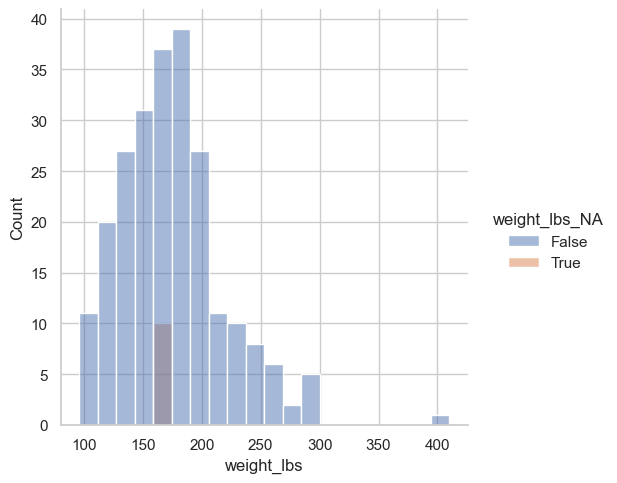

In [160]:


plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .filter(["weight_lbs", "height_inch", "bmi"])  # Seleccionando columnas específicas para análisis
    .missing.bind_shadow_matrix(true_string=True, false_string=False)  # Creando una matriz sombra para valores faltantes
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )  # Imputando valores faltantes con la media de la columna
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="weight_lbs",
                hue="weight_lbs_NA"  # Visualizando la distribución con respecto a la presencia de valores faltantes
            )
        )
    )
)



   **Preparación de la Figura para Visualización**:
   - `plt.figure(figsize=(10, 10))`: Define el tamaño de la figura en la que se mostrará el gráfico, en este caso, un cuadrado de 10x10 pulgadas.

   **Selección de Columnas y Creación de una Matriz Sombra**:
   - `.filter(["weight_lbs", "height_inch", "bmi"])`: Filtra el DataFrame `riskfactors_df` para trabajar solo con las columnas `weight_lbs`, `height_inch` y `bmi`.
   - `.missing.bind_shadow_matrix(true_string=True, false_string=False)`: Crea una matriz sombra para las columnas seleccionadas, donde `True` indica la presencia de un valor faltante y `False` indica que el dato está presente.

   **Imputación de Valores Faltantes**:
   - `.apply(...)`: Aplica una función a lo largo de cada fila. Si el nombre de la columna no termina en "_NA", lo que indicaría que es parte de la matriz sombra, rellena los valores faltantes con la media de esa columna.

   **Visualización con Seaborn**:
   - `.pipe(lambda df: sns.displot(data=df, x="weight_lbs", hue="weight_lbs_NA"))`: Utiliza la función `displot` de Seaborn para crear un gráfico de distribución de la columna `weight_lbs`. Los datos se colorean según la columna `weight_lbs_NA` de la matriz sombra, lo que permite visualizar la distribución tanto de los datos originales como de los imputados.



- Al visualizar la distribución de `weight_lbs` con respecto a los valores originales y los imputados (indicados por `weight_lbs_NA`), se puede evaluar si la imputación ha modificado de manera significativa la distribución de la variable.


<AxesSubplot:xlabel='weight_lbs', ylabel='height_inch'>

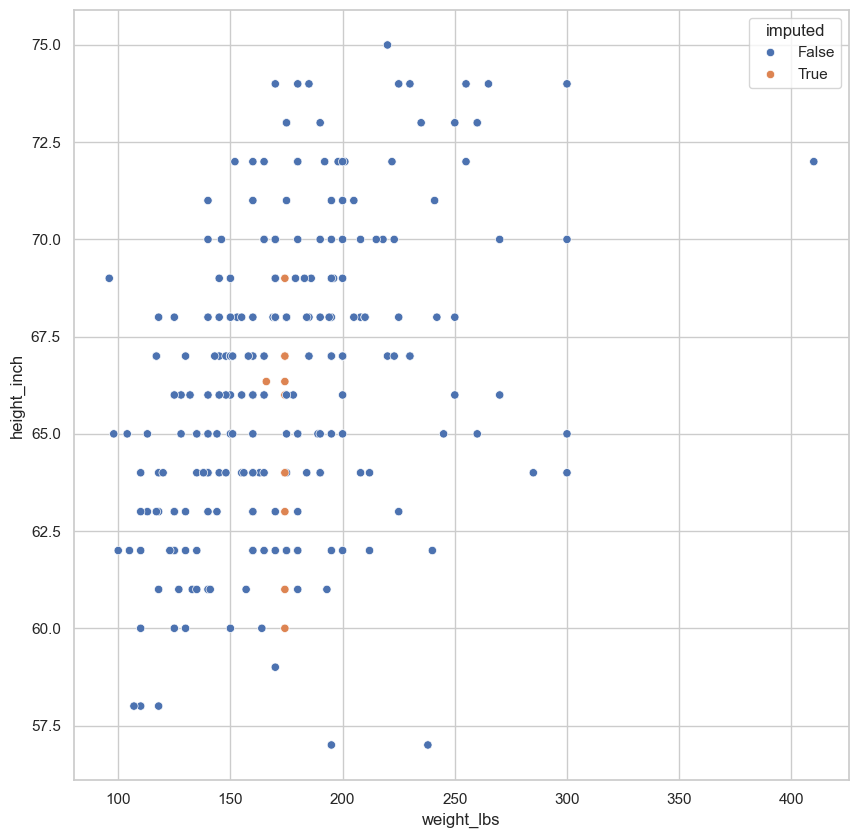

In [154]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .select_columns("weight_lbs", "height_inch", "bmi")
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean()) if "_NA" not in column.name else column
    )
    .assign(
        imputed=lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x="weight_lbs",
                y="height_inch",
                hue="imputed"
            )
        )
    )
)



   **Configuración de la Figura**:
   - `plt.figure(figsize=(10, 10))`: Establece el tamaño de la figura para la visualización del gráfico.

   **Selección y Preparación de los Datos**:
   - `.filter(["weight_lbs", "height_inch", "bmi"])`: Selecciona las columnas relevantes para el análisis.
   - `.missing.bind_shadow_matrix(true_string=True, false_string=False)`: Crea una matriz sombra para identificar los valores faltantes en estas columnas.

   **Imputación de Valores Faltantes y Creación de la Columna `imputed`**:
   - `.apply(...)`: Imputa los valores faltantes en las columnas seleccionadas utilizando la media de cada columna.
   - `.assign(imputed=lambda df: df.weight_lbs_NA | df.height_inch_NA)`: Crea una nueva columna `imputed` que indica si se realizó imputación en `weight_lbs` o `height_inch`.

   **Visualización con Seaborn**:
   - `.pipe(lambda df: sns.scatterplot(data=df, x="weight_lbs", y="height_inch", hue="imputed"))`: Utiliza `scatterplot` de Seaborn para visualizar la relación entre `weight_lbs` y `height_inch`, con una diferenciación de colores basada en la imputación.



- Este enfoque permite evaluar visualmente la relación entre dos variables importantes (`weight_lbs` y `height_inch`) después de imputar los datos faltantes.


<Figure size 1000x1000 with 0 Axes>

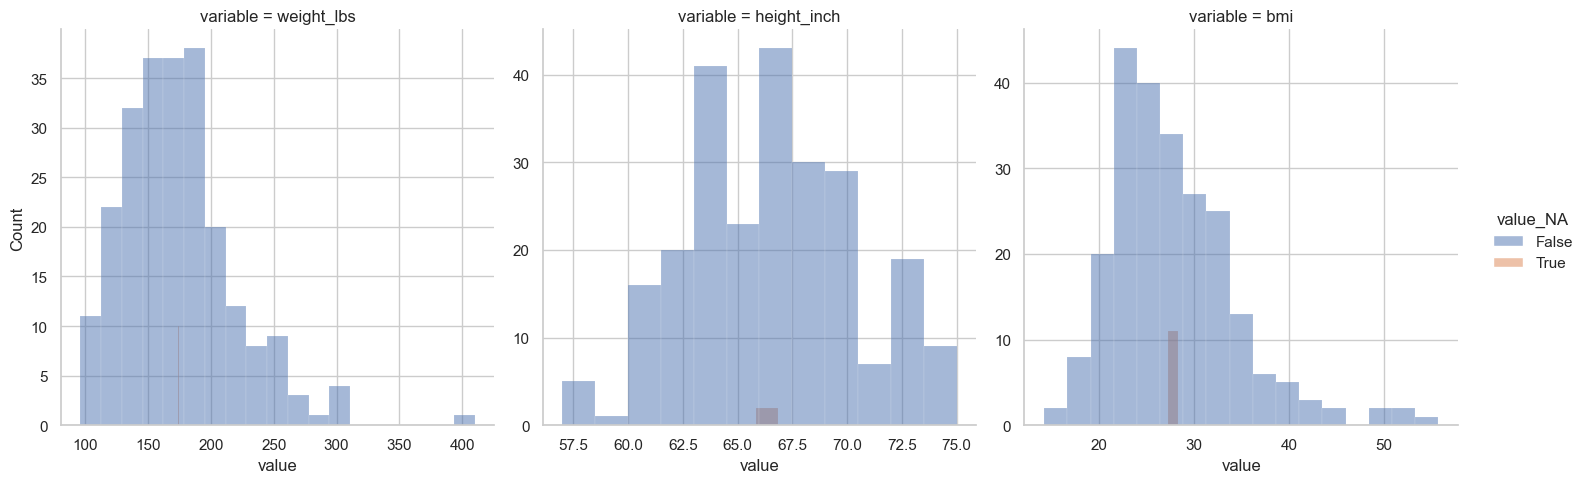

In [163]:
plt.figure(figsize=(10, 10))

(
    riskfactors_df
    .filter(["weight_lbs", "height_inch", "bmi"])
    .missing.bind_shadow_matrix(true_string=True, false_string=False)
    .apply(
        axis="rows",
        func=lambda column: column.fillna(column.mean())
        if "_NA" not in column.name
        else column,
    )
    .pivot_longer(
        index="*_NA"
    )
    .pivot_longer(
        index=["variable", 'value'],
        names_to="variable_NA",
        values_to="value_NA"
    )
    .assign(
        valid=lambda df: df.apply(axis="columns", func=lambda column: column.variable in column.variable_NA)
    )
    .query("valid")
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x="value",
                hue="value_NA",
                col="variable",
                common_bins=False,
                facet_kws={
                    "sharex": False,
                    "sharey": False
                }
            )
        )
    )
)




   **Configuración de la Figura**:
   - `plt.figure(figsize=(10, 10))`: Define el tamaño de la figura para la visualización.

   **Selección y Preparación de los Datos**:
   - `.filter(["weight_lbs", "height_inch", "bmi"])`: Selecciona las columnas relevantes para el análisis.
   - `.missing.bind_shadow_matrix(...)`: Genera una matriz sombra para identificar los valores faltantes en estas columnas.

   **Imputación de Valores Faltantes**:
   - `.apply(...)`: Aplica la imputación de valores faltantes en las columnas seleccionadas utilizando la media de cada columna.

   **Transformación y Visualización**:
   - `pd.melt(...)`: Transforma el DataFrame para facilitar la visualización, convirtiendo las columnas en filas.
   - `sns.displot(...)`: Crea un gráfico de distribución para cada variable, diferenciando los datos originales de los imputados.



- Este enfoque permite visualizar las distribuciones de las variables clave (`weight_lbs`, `height_inch`, `bmi`) después de la imputación de valores faltantes.
- La transformación de datos facilita la comparación de las distribuciones de los datos originales con los imputados.



## Información de sesión

In [156]:
session_info.show()

/Users/ivanozono/Proyects/missing_values_detection/venv/lib/python3.10/site-packages/session_info/main.py:213: DeprecationWarning: Accessing jsonschema.__version__ is deprecated and will be removed in a future release. Use importlib.metadata directly to query for jsonschema's version.
  mod_version = _find_version(mod.__version__)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=694a3d08-7f18-421d-9e2f-c2820a79680e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>